# SUPERVIVENCIA EN EL HUNDIMIENTO DEL TITANIC

### El objetivo es dar con los factores que influyeron en la supervivencia y así comprender mejor la tragedia del hundimento


#### A bordo del Titanic viajaban aproximadamente 2,240 personas entre pasajeros y tripulación. El barco estaba diseñado para transportar a unos 2,435 pasajeros y una tripulación de 892 personas, pero el día del hundimiento llevaba menos de su capacidad total.

#### Partió de Southampton e hizo escalas en Cherburgo y Queenstown.

#### El dataset del titanic es una muestra del manifiesto de pasajeros con 891 personas.

In [36]:
#!pip install pandas
#import pandas as pd
#!pip install seaborn
#import seaborn as sns
#!pip install matplotlib
#!pip install scipy

### Cargo y preparo el dataset del Titanic.

In [37]:

import pandas as pd
import seaborn as sns

from viztools import *
from univariante import card_tipo
from scipy.stats import chi2_contingency, mannwhitneyu
import matplotlib.pyplot as plt

In [38]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic.head(40)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [39]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


| Columna   | Descripción                                                                 |
|-----------|-----------------------------------------------------------------------------|
| `survived`| Indica si el pasajero sobrevivió (1) o no (0).                              |
| `pclass`  | Clase del pasajero (1: Primera clase, 2: Segunda clase, 3: Tercera clase).  |
| `sex`     | Género del pasajero (male: hombre, female: mujer).                          |
| `age`     | Edad del pasajero. Puede haber valores nulos.                               |
| `sibsp`   | Número de hermanos/esposos(as) a bordo.                                     |
| `parch`   | Número de padres/hijos a bordo.                                             |
| `fare`    | Precio del boleto pagado por el pasajero.                                   |
| `embarked`| Puerto de embarque (C: Cherburgo, Q: Queenstown, S: Southampton).           |
| `class`   | Clase del pasajero en formato categórico (First, Second, Third).            |
| `who`     | Descripción de quién es el pasajero (man: hombre, woman: mujer, child: niño).|
| `adult_male` | Indica si el pasajero es un hombre adulto (True) o no (False).           |
| `deck`    | Cubierta del barco en la que estaba el pasajero. Puede tener valores nulos. |
| `embark_town`| Ciudad desde la que embarcó el pasajero (Cherbourg, Queenstown, Southampton).|
| `alive`   | Indica si el pasajero está vivo (yes) o no (no).                            |
| `alone`   | Indica si el pasajero viajaba solo (True) o acompañado (False).  

In [40]:
card_tipo(df_titanic)

,Card,%_Card,Tipo,tipo_sugerido
survived,2,0.224467,int64,Binaria
pclass,3,0.3367,int64,Categorica
sex,2,0.224467,object,Binaria
age,88,9.876543,float64,Numerica discreta
sibsp,7,0.785634,int64,Categorica
parch,7,0.785634,int64,Categorica
fare,248,27.833895,float64,Numerica discreta
embarked,3,0.3367,object,Categorica
class,3,0.3367,object,Categorica
who,3,0.3367,object,Categorica



Me desazgo de las columnas "deck", "survived", "pclass" y "embarked", la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [41]:
df_titanic.drop(columns=["deck","survived","pclass","embarked"], inplace= True)

In [42]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sex          891 non-null    object 
 1   age          714 non-null    float64
 2   sibsp        891 non-null    int64  
 3   parch        891 non-null    int64  
 4   fare         891 non-null    float64
 5   class        891 non-null    object 
 6   who          891 non-null    object 
 7   adult_male   891 non-null    bool   
 8   embark_town  889 non-null    object 
 9   alive        891 non-null    object 
 10  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 64.5+ KB


Sumo las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guardo el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [43]:
df_titanic["family_members"] = df_titanic['parch'] + df_titanic['sibsp']
df_titanic = df_titanic.drop(["parch","sibsp"], axis = 1)


Imputo la moda a los valores nulos de "embark_town". Se podrían coger esos tres valores faltantes de embarked que está completa (y debería) pero estoy haciendo un análisis rápido.

In [44]:
df_titanic['embark_town'].mode()[0]

'Southampton'

In [45]:
df_titanic.loc[df_titanic['embark_town'].isna(), "embark_town"] = df_titanic['embark_town'].mode()[0]

In [46]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             714 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


Imputo la media de la edad de cada grupo *child*, *woman* y *man* a la edad. El motivo por el que imputo en vez de eliminar filas es el siguiente: *age* ya está contenida en cierta manera en la variable categórica *who*, y no se extraen conclusiones importantes de la variable *age* en la forma en la que está hecho este análisis (no quiere decir que no haya dependencia entre *age* y *alive*)

In [47]:
df_titanic.loc[df_titanic['who']=='child','age'].max()

np.float64(15.0)

In [48]:
df_titanic.loc[df_titanic['who']=='woman','age'].min()

np.float64(16.0)

In [49]:
df_titanic.loc[df_titanic['who']=='man','age'].min()

np.float64(16.0)

In [50]:
df_titanic.groupby('who')['age'].mean()

who
child     6.369518
man      33.173123
woman    32.000000
Name: age, dtype: float64

In [51]:
#df_titanic["who_age_mean"] = df_titanic.groupby('who')['age'].transform("mean")
#df_titanic[["who","age","who_age_mean"]].round(1)

In [52]:
#df_titanic.loc[df_titanic["age"].isna(),"age"] = df_titanic.loc[df_titanic["age"].isna(),"who_age_mean"]
#df_titanic

In [53]:
df_titanic['age_who']=df_titanic.groupby('who')['age'].transform("mean")
df_titanic.head(20)

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members,age_who
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1,33.173123
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1,32.000000
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0,32.000000
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1,32.000000
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0,33.173123
5,male,NaN,8.4583,Third,man,True,Queenstown,no,True,0,33.173123
6,male,54.0,51.8625,First,man,True,Southampton,no,True,0,33.173123
7,male,2.0,21.0750,Third,child,False,Southampton,no,False,4,6.369518
8,female,27.0,11.1333,Third,woman,False,Southampton,yes,False,2,32.000000
9,female,14.0,30.0708,Second,child,False,Cherbourg,yes,False,1,6.369518


In [54]:
df_titanic.loc[df_titanic['age'].isna(),"age"]=df_titanic.loc[df_titanic['age'].isna(),"age_who"]

In [55]:
df_titanic.drop("age_who",axis=1,inplace=True)

In [56]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             891 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


### Realizo los análisis univariantes, bivariantes y multivariantes necesarios, así como los test de hipótesis para contestar a las siguientes preguntas.

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el género y la supervivencia en el Titanic? ¿Y entre ser adulto o ser niño? Podemos comprobar el *"mujeres y niños primero"* en la columna `who` 

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. ¿Existen pasajeros que no pagaron el billete?

6. ¿Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento?

7. ¿Posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

8. Curiosidad: ¿qué ocurrió con la persona que más dinero se dejó?

Nota: no sigo el orden formal univariante, bi-variante, multivariante necesariamente. Generalmente, después de estudiar un factor intento comprender su influencia en la supervivencia.

#### Estudio del Target *alive*

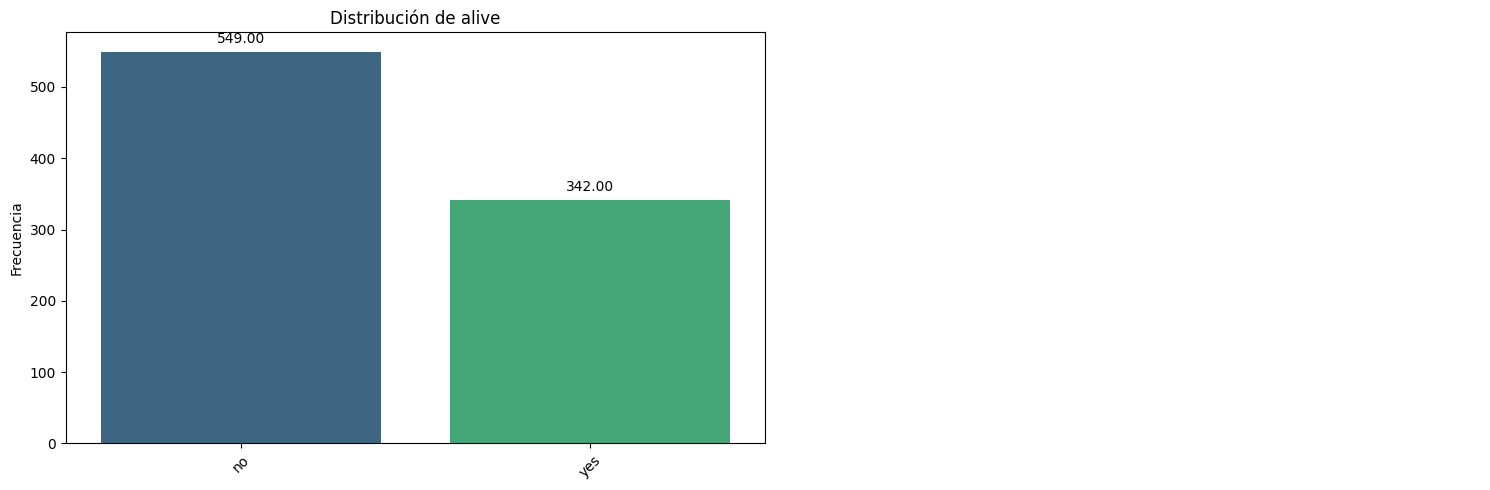

In [57]:
pinta_distribucion_categoricas(df_titanic,["alive"], mostrar_valores= True)

**En torno a 550 muertos y 340 supervivientes. Pero sabemos que estamos trabajando con una muestra así que es mejor que miremos los valores relativos.**

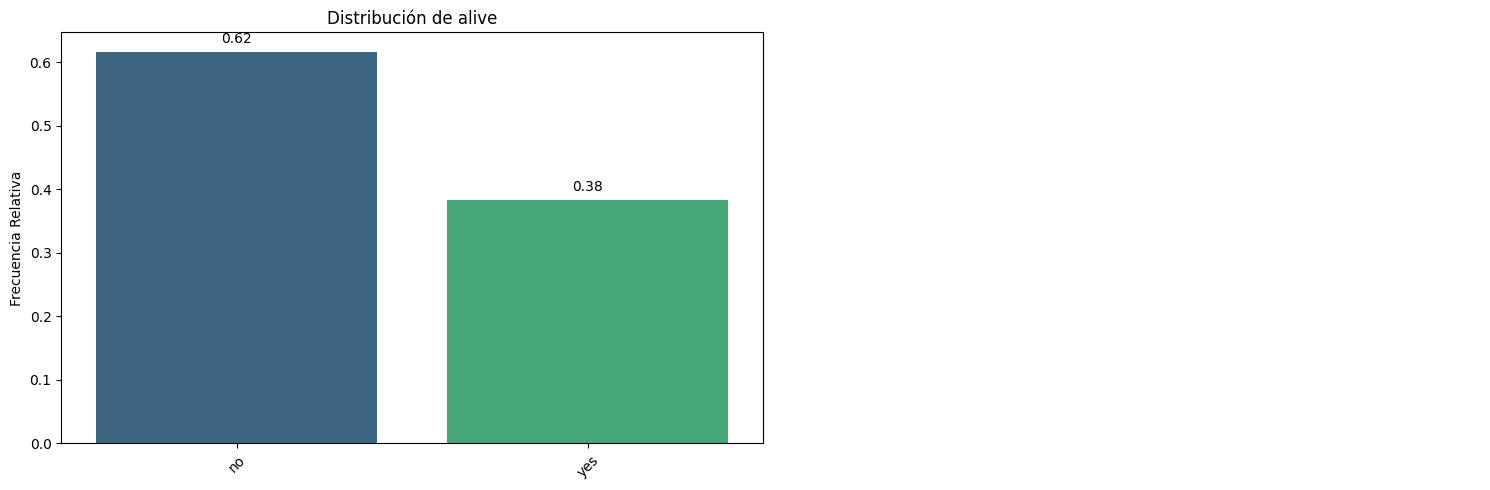

In [58]:
pinta_distribucion_categoricas(df_titanic,["alive"], relativa= True, mostrar_valores= True)

**La tasa de mortalidad global está en torno al 60%**

In [59]:
#df_titanic.groupby(["alive","who"])[["age","fare"]].mean().round(1).sort_values('fare')

## Estudio del factor *who: child, woman, man*

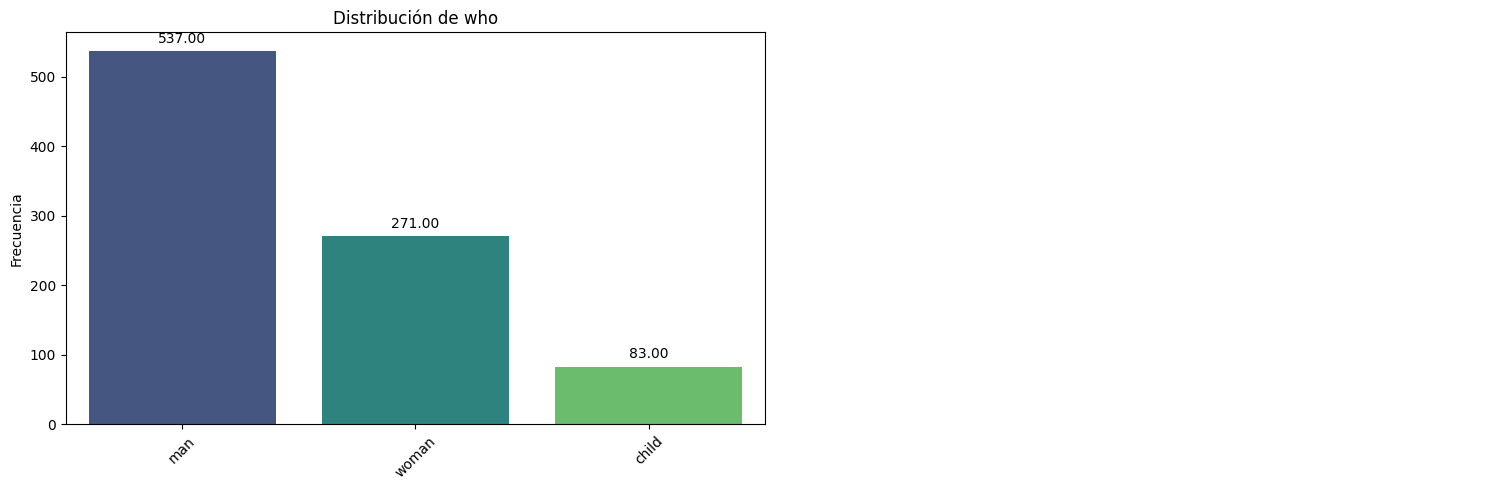

In [60]:
pinta_distribucion_categoricas(df_titanic,["who"], relativa= False, mostrar_valores= True)

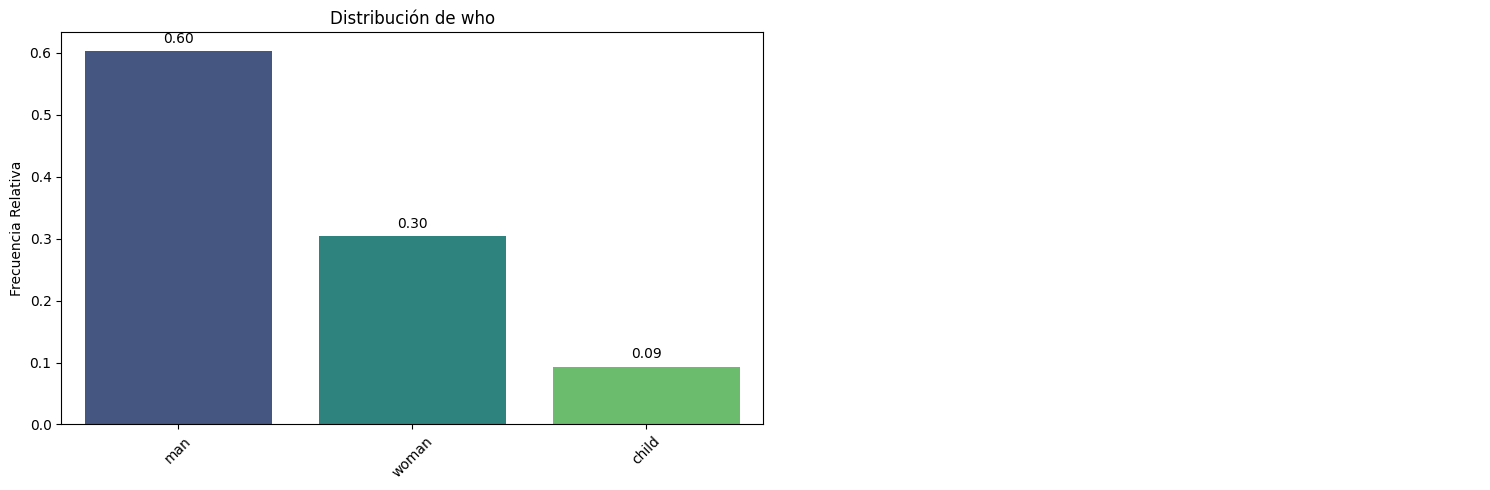

In [61]:
pinta_distribucion_categoricas(df_titanic,["who"], relativa=True, mostrar_valores= True)

#### Estudio del factor *who* con respecto a *alive*

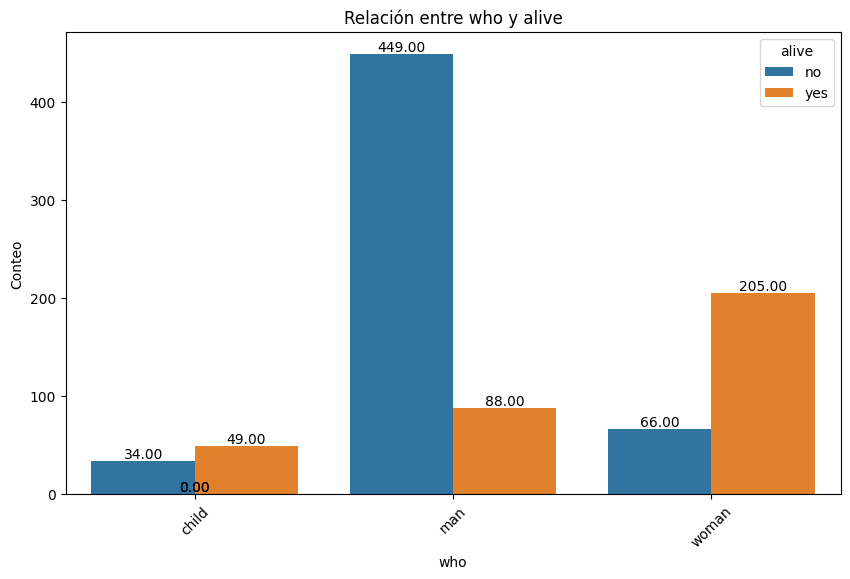

In [62]:
plot_categorical_relationship_fin(df_titanic, "who","alive", show_values= True)

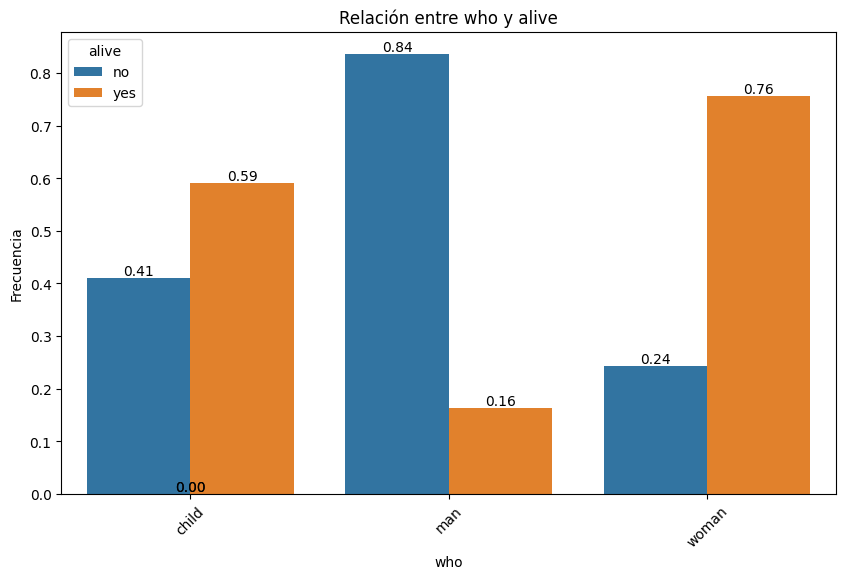

In [63]:
plot_categorical_relationship_fin(df_titanic, "who","alive", show_values= True, relative_freq=True)

**El factor who influyó en la tasa de supervivencia del pasajero.** Hago un test estadístico para comprobar la hipótesis.

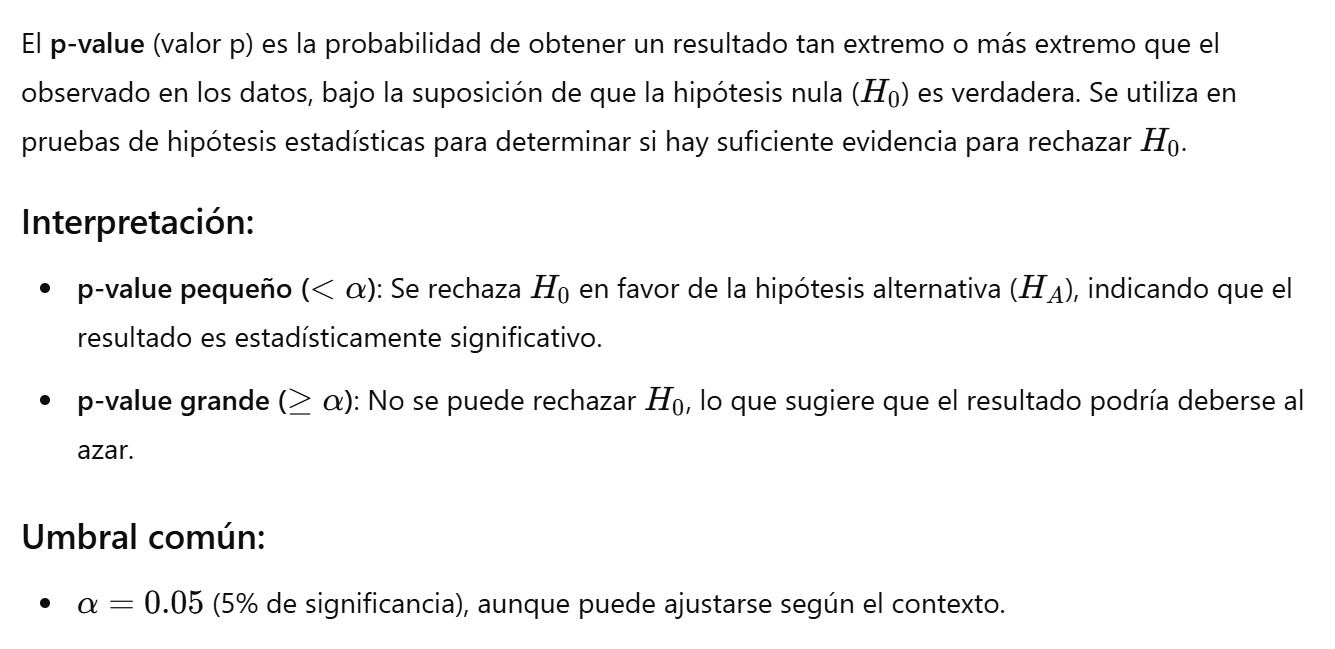

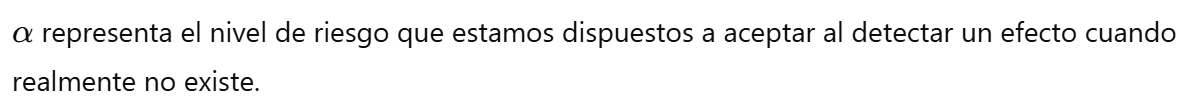

## Convenios para valores de $\alpha$ en otros campos. En Física de Partículas:

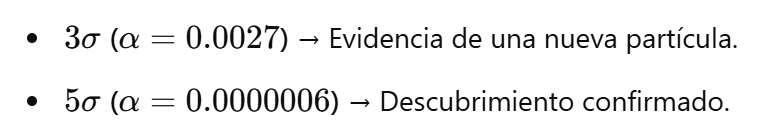

In [64]:

tabla_contingencia = pd.crosstab(df_titanic["alive"],df_titanic["who"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 283.923050324233
P-Value: 2.2227620817798914e-62
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 51.14141414 330.87878788 166.97979798]
 [ 31.85858586 206.12121212 104.02020202]]


**P-Value << 0.05 por lo tanto concluyo que el factor who fue determiante a la hora de decidir la suerte de los pasajeros.**

### Conclusiones ***who***:
Suponiendo que la muestra del manifiesto de pasajeros es **representativa**:
* En términos absolutos murieron muchos más hombres que cualquiera de los otros dos grupos. 
* En términos relativos, también la mortalidad fue superior: 84% en hombres, 41% en niños y 24% en mujeres.

* El test chi2 nos dice que debemos rechazar la hipótesis nula. Hipótesis nula es: daba igual ser hombre mujer o niño en cuanto a expectativas de supervivencia. Por lo tanto `who` si es un factor que influye en la supervivencia. 
* Pero otro dato interesante y que podríamos explorar es el hecho de que el grupo de los niños sufrió una mortalidad mucho mayor que el de las mujeres. *Mujeres y niños primero*.
* Las mujeres sobrevivieron más que los niños en terminos absolutos (viajaban más mujeres) y SORPRESA en terminos relativos. 
    * Intentaremos encontrar una explicación para esto.

## Incorporamos clase (***class***) al estudio de la supervivencia

### Comenzamos mirando la distribución de **class** (univariante)

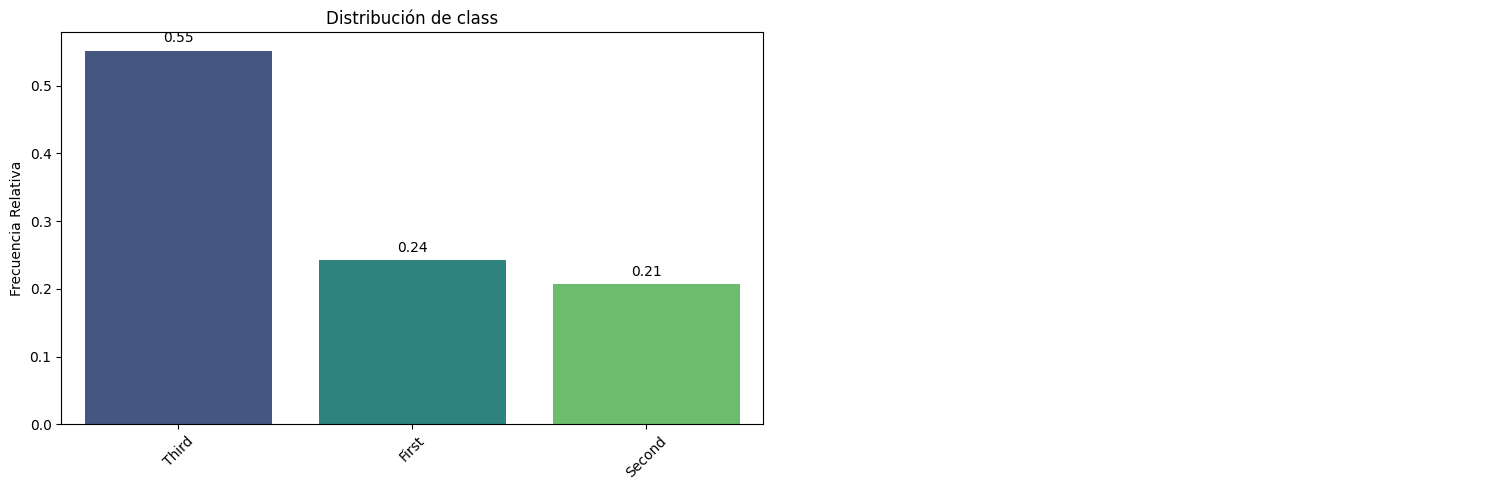

In [65]:
pinta_distribucion_categoricas(df_titanic,["class"], relativa=True, mostrar_valores= True)

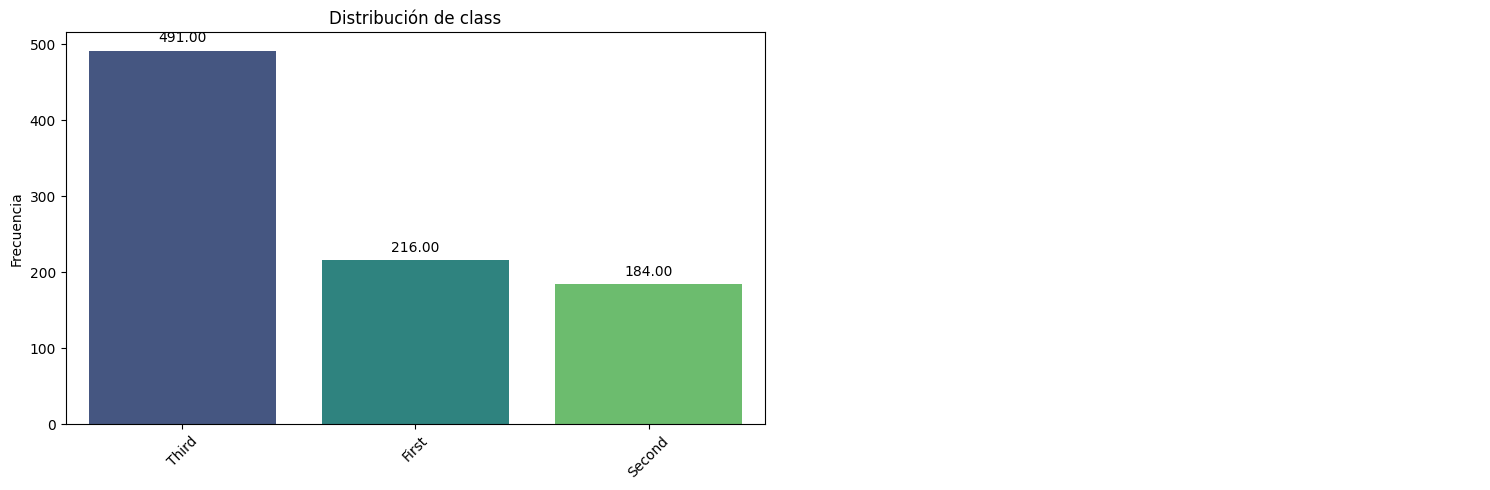

In [66]:
pinta_distribucion_categoricas(df_titanic,["class"], relativa=False, mostrar_valores= True)

* La mayoría de pasajeros viajaban en tercera clase. Primera 21%, Segunda 24%, Tercera 55%.

In [67]:
#pinta_distribucion_categoricas(df_titanic,["class"], relativa=True, mostrar_valores= True)

In [68]:
#pinta_distribucion_categoricas(df_titanic,["class"], relativa=True, mostrar_valores= True)

#### Ahora comprobamos la relación entre **class** y **alive**

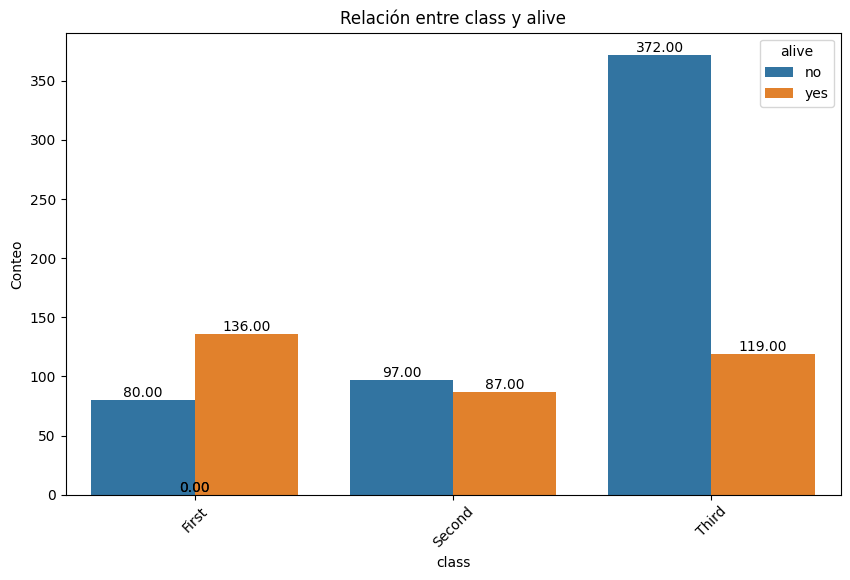

In [69]:
plot_categorical_relationship_fin(df_titanic, "class","alive", show_values = True)

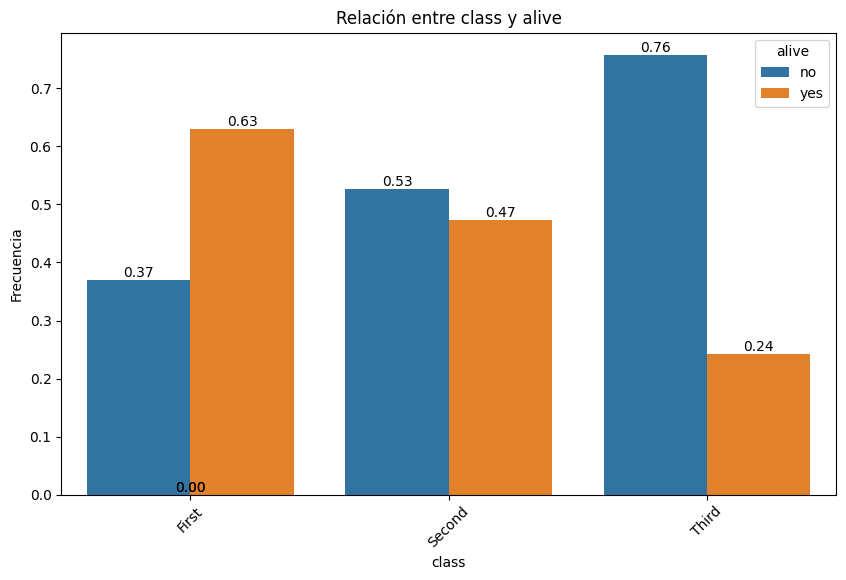

In [70]:
plot_categorical_relationship_fin(df_titanic, "class","alive", show_values = True,relative_freq=True)

In [71]:

tabla_contingencia = pd.crosstab(df_titanic["alive"],df_titanic["class"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 102.88898875696056
P-Value: 4.549251711298793e-23
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


**P-Value << 0.05 por lo tanto concluyo que el factor class fue determiante a la hora de decidir la suerte de los pasajeros.**

## Quiero entender el misterio mujeres/niños.
### A continuación, hago un analisis trivariante para **alive** con **who** y con **class**. 


#### Comienzo por examinar la distribución de **who** con respecto a **class** antes de comparar las tasas de mortalidad con el target **alive** para cada combinación de **who** y **class** 

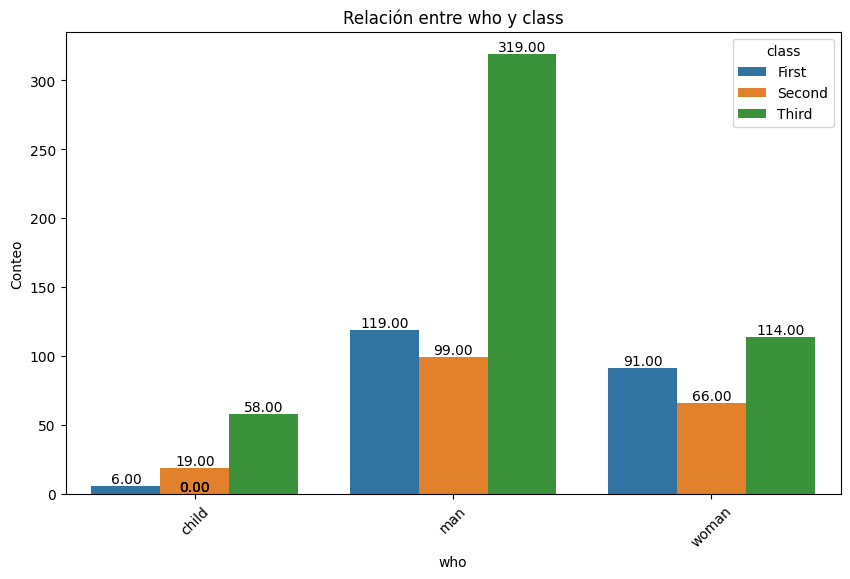

In [72]:
plot_categorical_relationship_fin(df_titanic,"who","class", relative_freq= False, show_values= True)

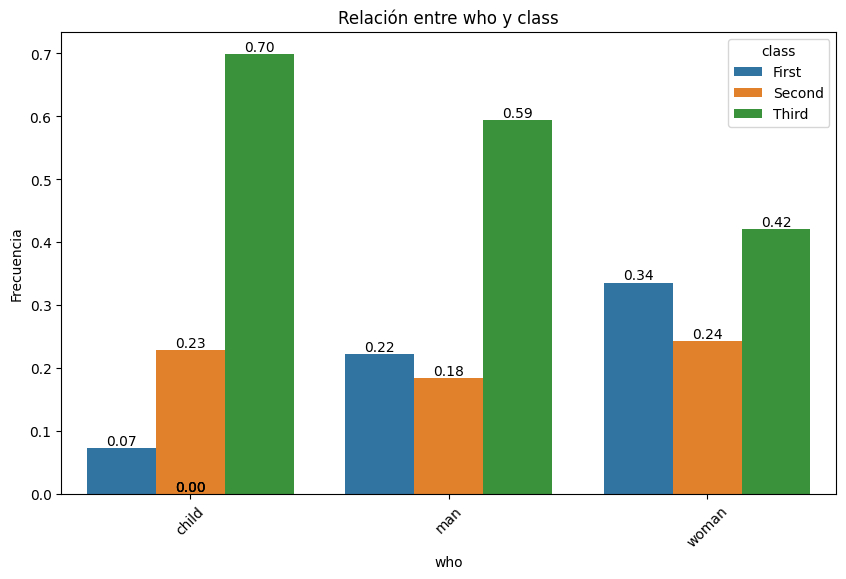

In [73]:
plot_categorical_relationship_fin(df_titanic,"who","class", relative_freq= True, show_values= True)

* La mayoría de ninos viajaban en tercera clase, que tiene una mortalidad más alta. Esto explicaría la SORPRESA. Pero estoy mirando los factores de forma independiente. Vamos a mirarlos de forma conjunta a continuación.

#### Para cada clase estudio las diferentes tasas de supervivencia de **who**.

In [74]:

clases = df_titanic['class'].unique()
print(clases)

['Third' 'First' 'Second']


Para clase:  First


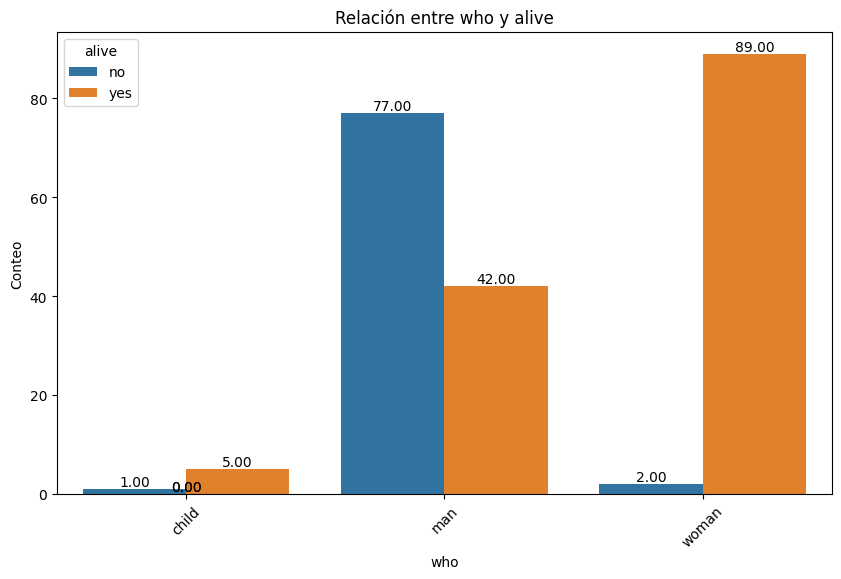

Para clase:  Second


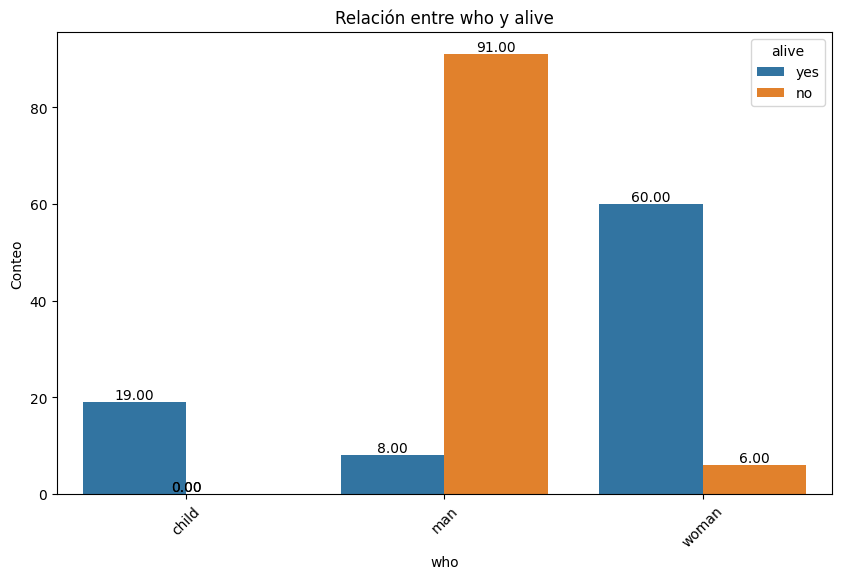

Para clase:  Third


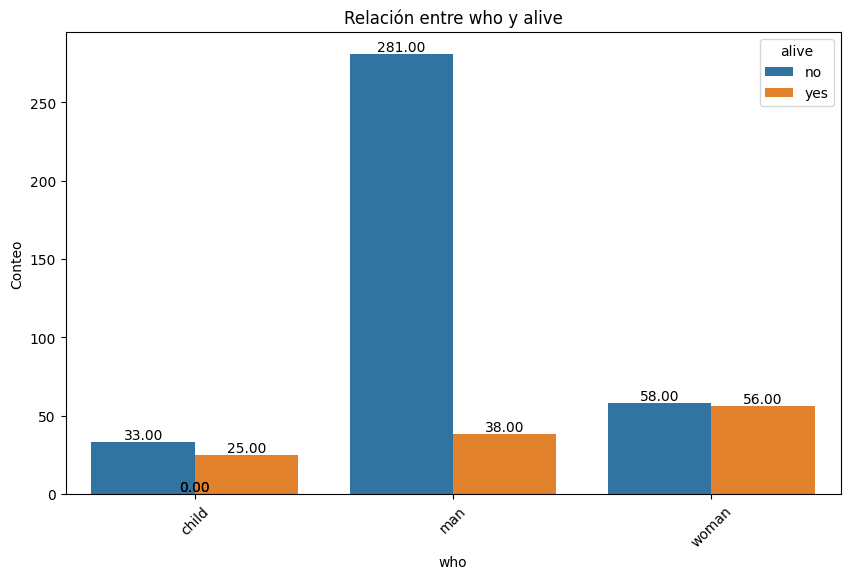

In [75]:
for clase in ['First','Second','Third']:
    print('Para clase: ', clase)
    df_temp = df_titanic[df_titanic['class'] == clase]
    plot_categorical_relationship_fin(df_temp,'who','alive', relative_freq=False, show_values=True)

Para clase:  First


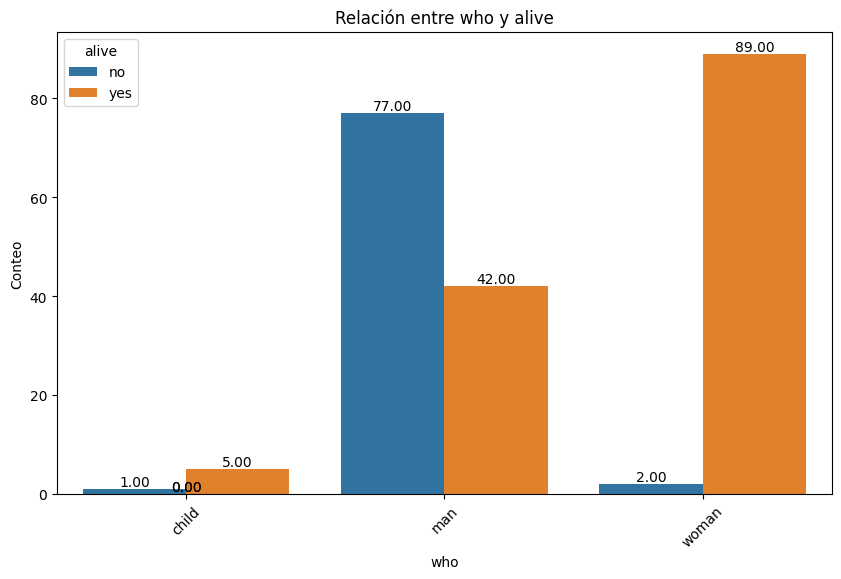

Para clase:  Second


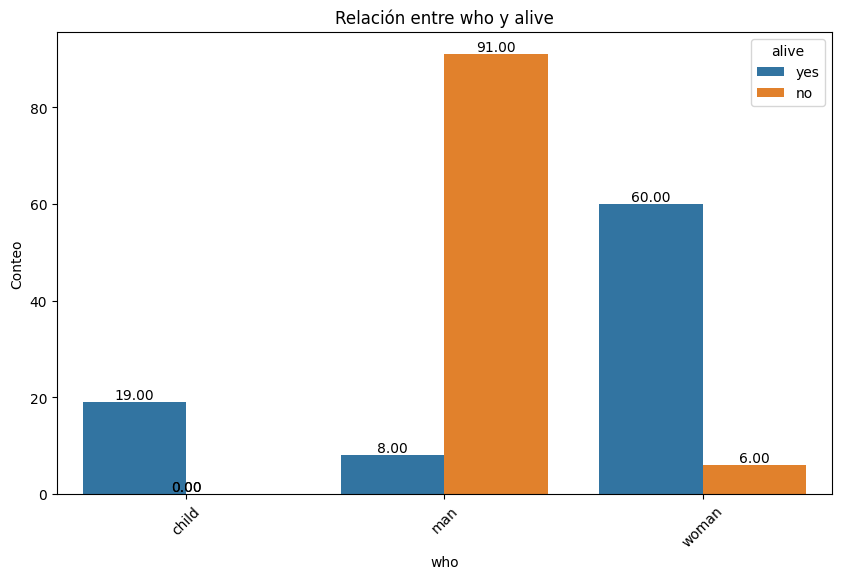

Para clase:  Third


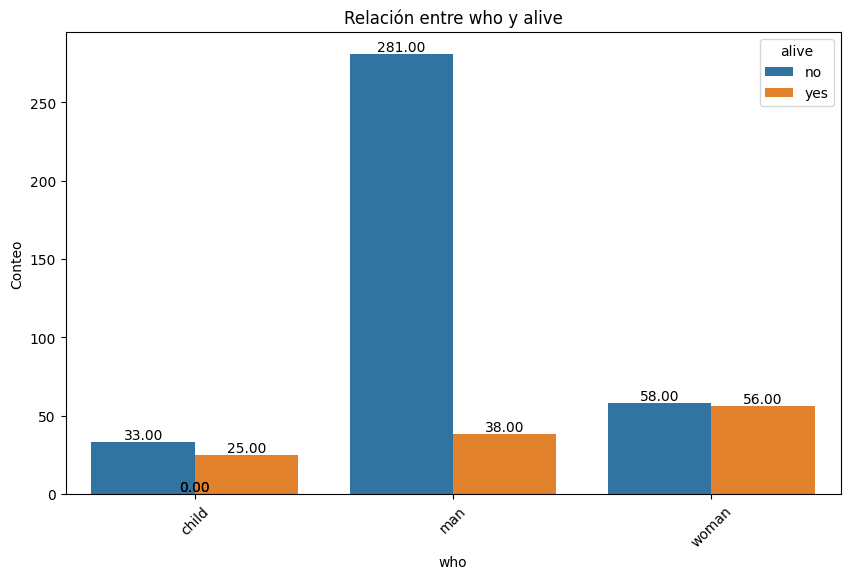

In [76]:
for clase in ['First','Second','Third']:
    print('Para clase: ', clase)
    df_temp = df_titanic[df_titanic['class'] == clase]
    plot_categorical_relationship_fin(df_temp,'who','alive', relative_freq=False, show_values=True)

**Fluctuaciones estadísticas altas para niños en primera y segunda debidas a una muestra excesivamente pequenia.**

* Las tasas de supervivencia de ninos en primera no es muy de fiar ya que tenemos una muestra muy pequena.
* Mirando a tercera clase podemos observar que la tasa de supervivencia de mujeres y ninos es similar. Parece confirmar nuestra hipótesis de que la tasa de supervivencia de las mujeres es mayor a la de los ninos porque viajaban más mujeres en primera y segunda clase.
* Los hombres de segunda también murieron en una proporción muy alta.

In [77]:
#plot_categorical_relationship_fin(df_titanic,"who","class", relative_freq= False, show_values= True)

In [78]:
#plot_categorical_relationship_fin(df_titanic,"who","class", relative_freq= True, show_values= True)

In [79]:
#plot_categorical_relationship_fin(df_titanic,"who","class", show_values= True)

#### Más conclusiones:
* La explicación de la supervivencia está en la combinación de factores who y class, de momento.
* Las mujeres y niños sobrevivieron más en general.
* Además, proporcionalmente, había muchos más niños en tercera (70%) que mujeres en tercera (40%). Eso explica que la tasa de supervivencia de las mujeres sea más alta que la de los niños: porque iban en primera.

### Estudio de la ciudad de embarque **embark_town** como factor en la supervivencia

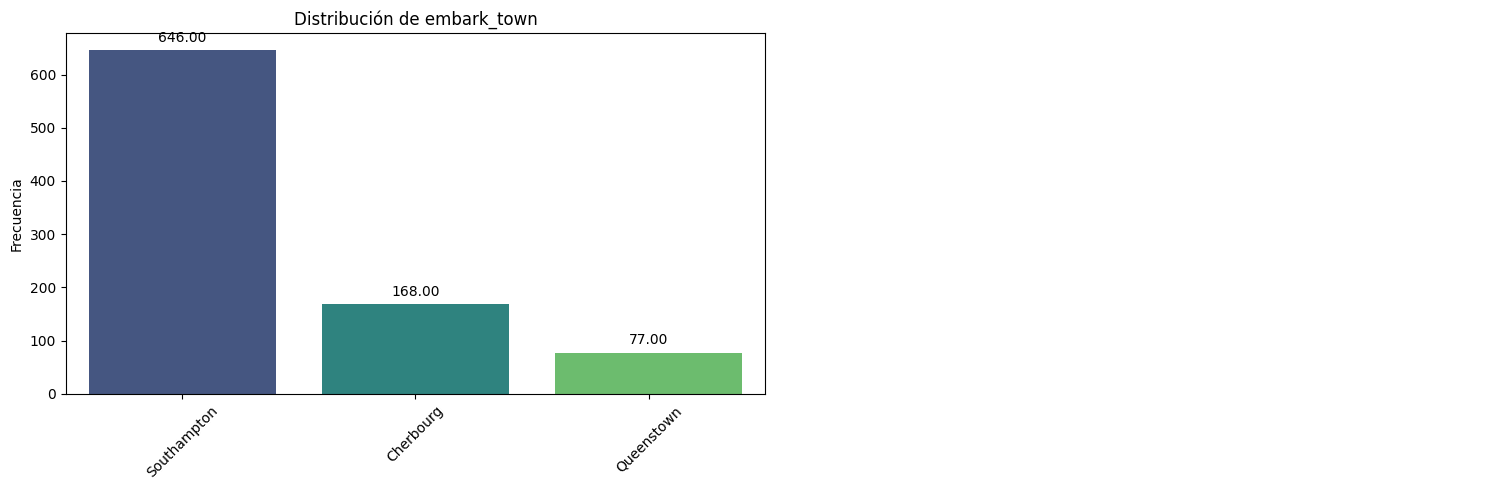

In [80]:
pinta_distribucion_categoricas(df_titanic,["embark_town"], relativa=False, mostrar_valores= True)

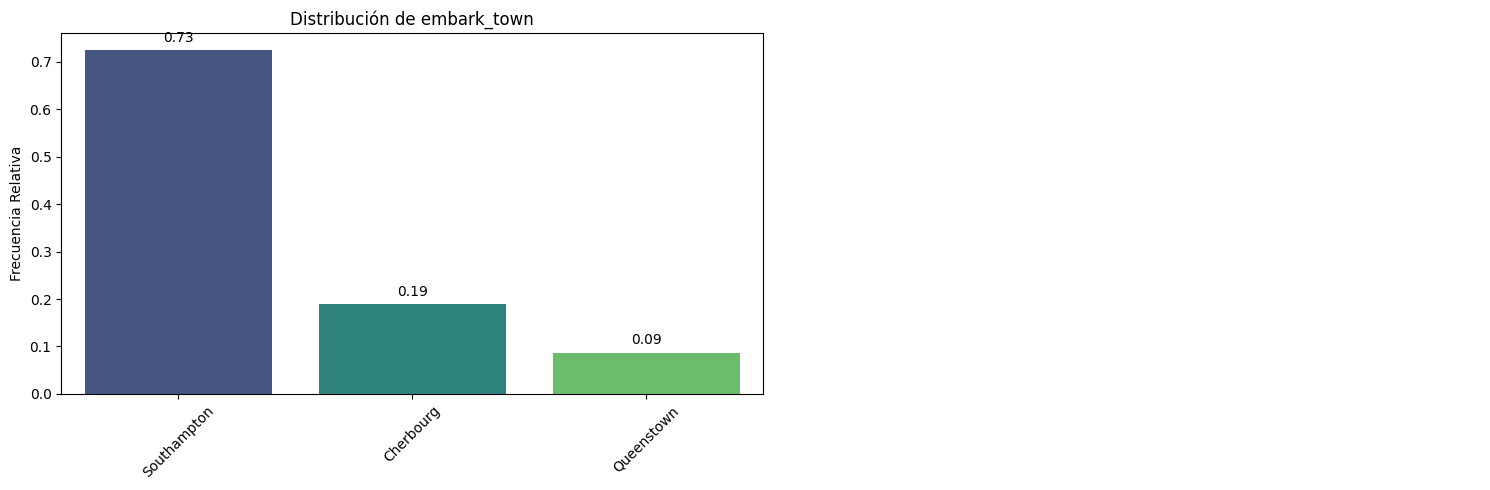

In [81]:
pinta_distribucion_categoricas(df_titanic,["embark_town"], relativa=True, mostrar_valores= True)

**El Titanic partío de Southampton, donde subieron la mayor parte de los pasajeros (73%), hizo escala en Cherbourg (20%) y Queenstown (10%)**

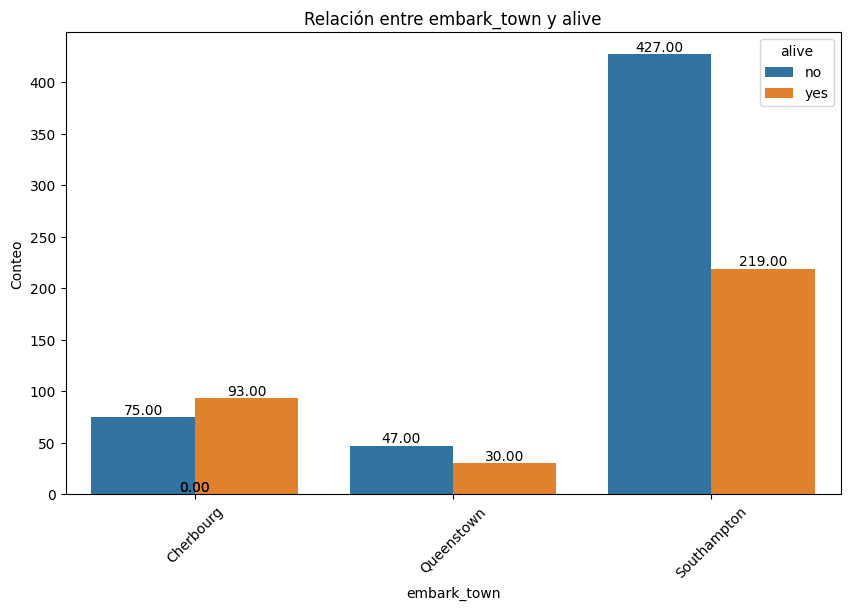

In [82]:
plot_categorical_relationship_fin(df_titanic, "embark_town","alive", show_values= True,relative_freq=False)

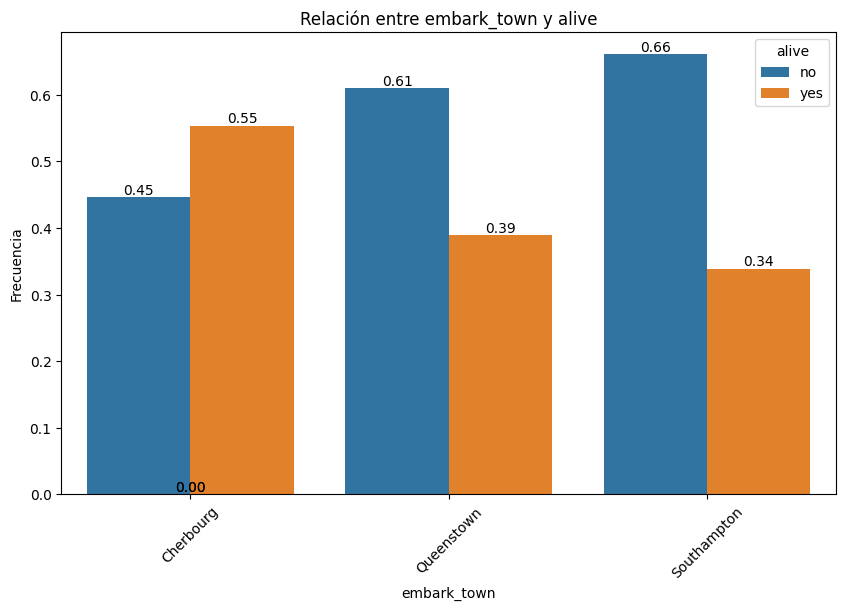

In [83]:
plot_categorical_relationship_fin(df_titanic, "embark_town","alive", show_values= True,relative_freq=True)

In [84]:
df_titanic.groupby('embark_town',as_index=False)['alive'].value_counts()

,embark_town,alive,count
0,Cherbourg,yes,93
1,Cherbourg,no,75
2,Queenstown,no,47
3,Queenstown,yes,30
4,Southampton,no,427
5,Southampton,yes,219


In [85]:

tabla_contingencia = pd.crosstab(df_titanic["alive"],df_titanic["embark_town"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 25.964452881874784
P-Value: 2.3008626481449577e-06
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[103.51515152  47.44444444 398.04040404]
 [ 64.48484848  29.55555556 247.95959596]]


* ATENCIÓN: Sobrevivieron más en términos absolutos entre los que embarcaron en Southampton que los que lo hicieron en el resto de puertos!!!
* El test Chi-2 nos confirma que el puerto en el que embarcaron influyó en si sobrevivieron o no.
* ¿Puede que algunos puertos tengan mal de ojo?
* O puede ser que este sesgo (diferencia) venga motivado por otros factores, como que embarcaron más hombres en Southampton o más gente en tercera clase
* Lo comprobamos

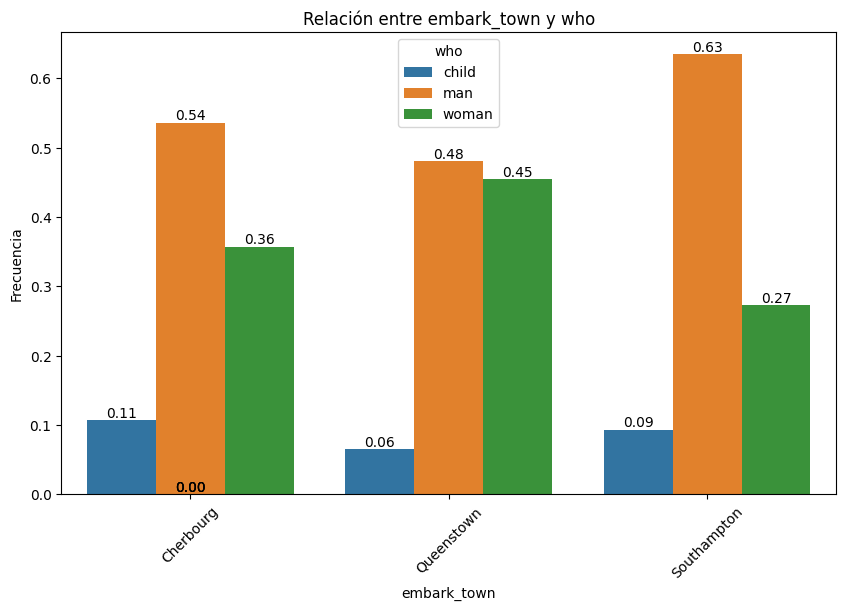

In [86]:
plot_categorical_relationship_fin(df_titanic, "embark_town","who", relative_freq= True, show_values= True)

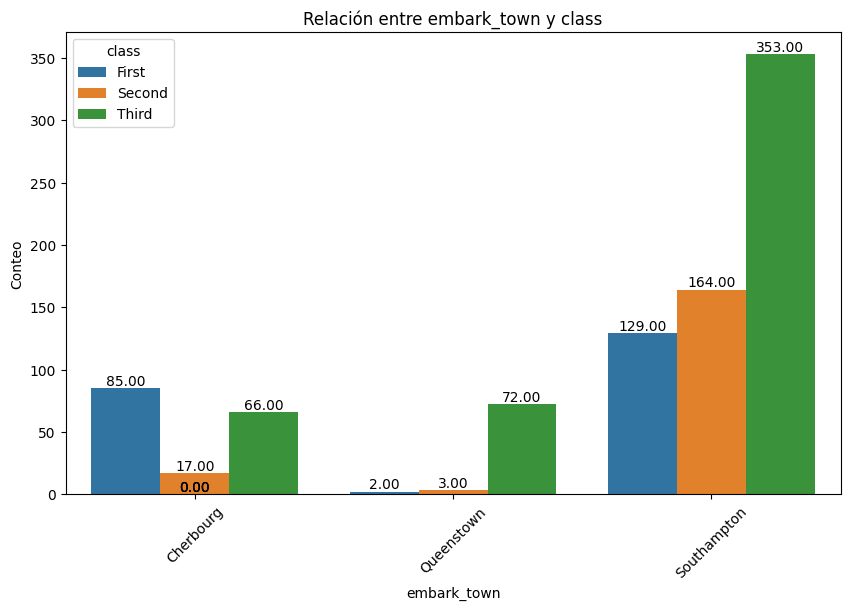

In [87]:
plot_categorical_relationship_fin(df_titanic, "embark_town","class", relative_freq= False, show_values= True)

* Viendo estas dos últimas gráficas parece explicarse bastante.
* En Cherbourgo la proporción de pasajeros de primera es mayor bastante mayor que en los otros dos puertos. 
* Y la diferencia entre los ratios de Queenstown y de Southampton podría explicarse por el ratio de mujeres que embarcaron en una y otra ciudad. 
* CONCLUSIÓN: más que magia en el origen, el ser mujer y la clase influye mucho como para enmascarar esta relación. 
* ¿Qué deberíamos hacer para hacer desaparecer la relación **embark_town/alive** matemáticamente?

* Fijamos los valores who y class y vemos si existe relación entre embark_town y alive. Eso se llama controlar por esas variables. Queremos ver las tasas de supervivencia eliminando esos factores, o para cada combinación de esos factores.
* Si realmente no hay relación entre ellos salvo la debida a la clase del pasaje y al tipo de pasajero saldrá que son independientes para cada combinación

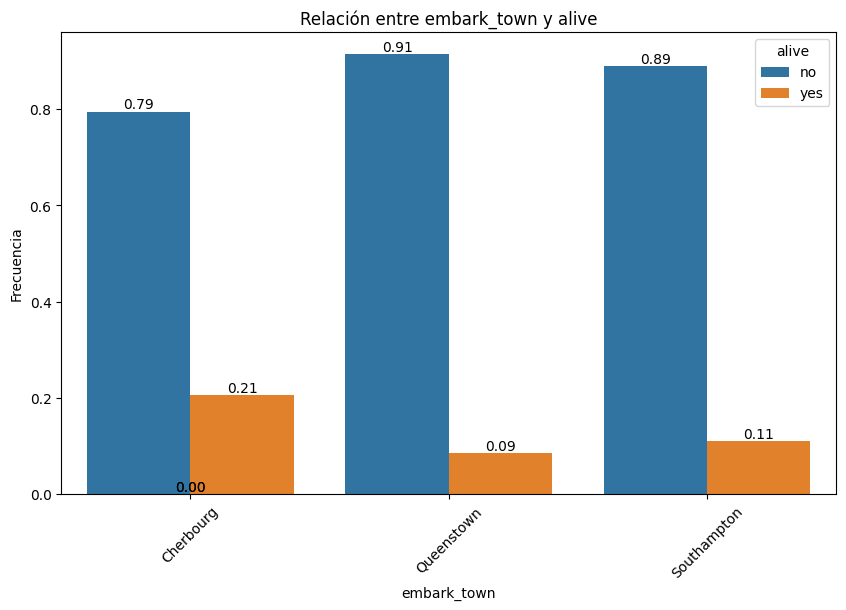

In [88]:
df_test = df_titanic.loc[(df_titanic.who == "man") & (df_titanic["class"] == "Third")].copy() # Fijo clase y who, si realmente hay dependencia por otros factores entre ciudad y sobrevivir, debería salir en los test y en las gráficas

plot_categorical_relationship_fin(df_test,"embark_town","alive", relative_freq= True, show_values= True)

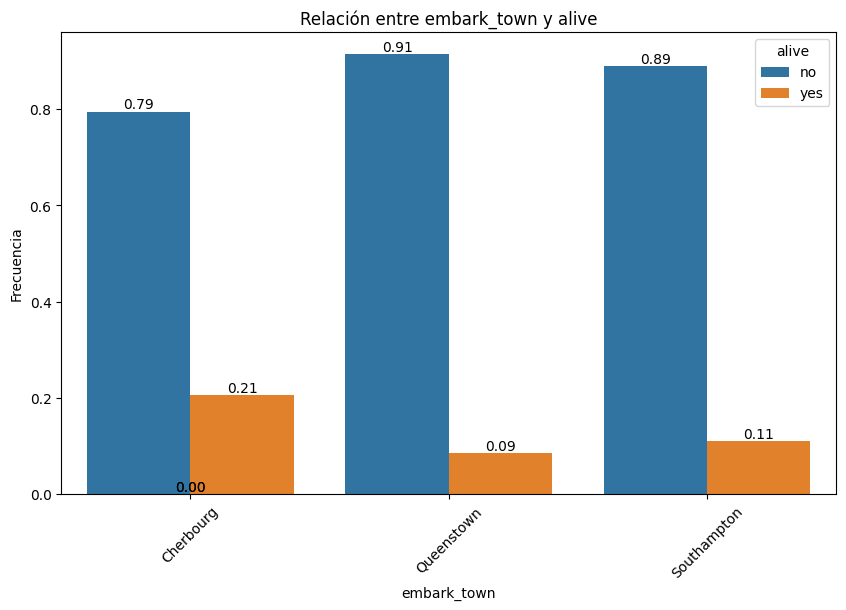

In [89]:
df_test = df_titanic.loc[(df_titanic.who == "man") & (df_titanic["class"] == "Third")].copy() # Fijo clase y who, si realmente hay dependencia por otros factores entre ciudad y sobrevivir, debería salir en los test y en las gráficas

plot_categorical_relationship_fin(df_test,"embark_town","alive", relative_freq= True, show_values= True)

In [90]:
tabla_contingencia = pd.crosstab(df_test["alive"],df_test["embark_town"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 3.3072128132305267
P-Value: 0.1913585459765817
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 34.35423197  30.830721   215.81504702]
 [  4.64576803   4.169279    29.18495298]]


### Efectivamente la dependencia estadística desaparece para el grupo (who="man", class="Third"). Fijarse en las tasas de supervivencia que son muy similares. Fijarse en el p-value que ya no permite rechazar la hipótesis nula de que sí influye el puerto.

### Ahora fijamos clase y who en subdatasets: 3 categorías de who x 3 categorías de clase: 9 plots y 9 chi-2

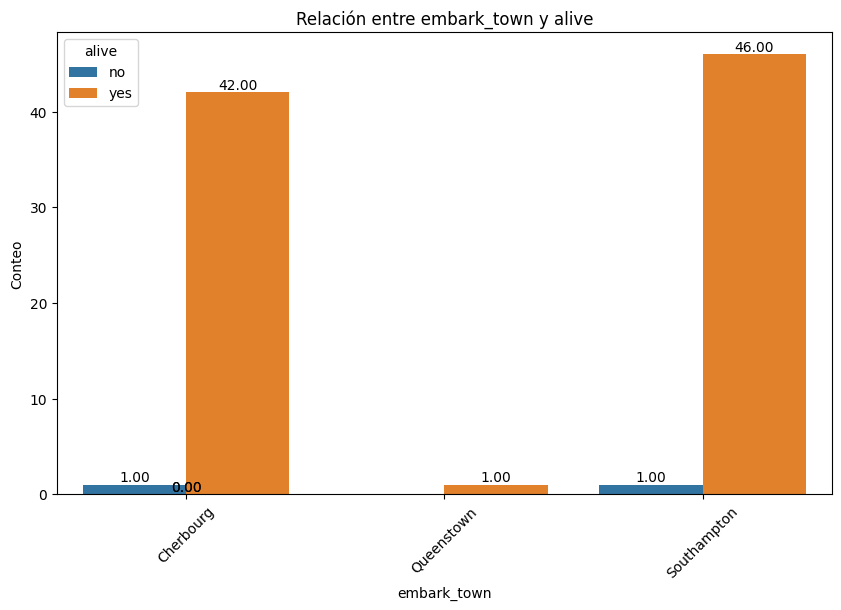

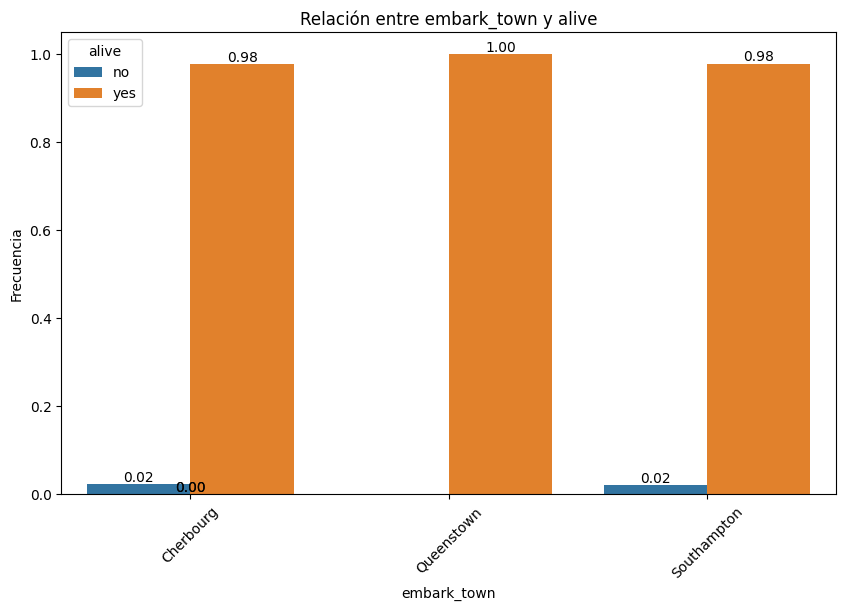

Valor Chi-Cuadrado: 0.02681395904797383
P-Value: 0.9866824937243175
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[9.45054945e-01 2.19780220e-02 1.03296703e+00]
 [4.20549451e+01 9.78021978e-01 4.59670330e+01]]


In [91]:
df_test = df_titanic.loc[(df_titanic.who == "woman") & (df_titanic["class"] == "First")].copy() # Fijo clase y who, si realmente hay dependencia por otros factores entre ciudad y sobrevivir, debería salir en los test y en las gráficas
plot_categorical_relationship_fin(df_test,"embark_town","alive", relative_freq= False, show_values= True)
plot_categorical_relationship_fin(df_test,"embark_town","alive", relative_freq= True, show_values= True)

tabla_contingencia = pd.crosstab(df_test["alive"],df_test["embark_town"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

In [92]:
#df_test = df_titanic.loc[(df_titanic.who == "man") & (df_titanic["class"] == "Third")].copy() # Fijo clase y who, si realmente hay dependencia por otros factores entre ciudad y sobrevivir, debería salir en los test y en las gráficas

#plot_categorical_relationship_fin(df_test,"embark_town","alive", relative_freq= False, show_values= True)
#plot_categorical_relationship_fin(df_test,"embark_town","alive", relative_freq= True, show_values= True)

#tabla_contingencia = pd.crosstab(df_test["alive"],df_test["embark_town"])

#chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


#print("Valor Chi-Cuadrado:", chi2)
#print("P-Value:", p)
#print("Grados de Libertad:", dof)
#print("Tabla de Frecuencias Esperadas:\n", expected)

* En principio se debería hacer lo mismo para todas las combinaciones de who y de class: 9 tablas de contingencia, menos las que ya hemos hecho.
* Por motivos de espacio y tiempo, a continuación se muestran sólo las combinaciones para las que no se puede rechazar la hipótesis nula de que embark_town no influye en alive.
* Es decir, os mostramos las gráficas y la chi-2 de lo que sorprende, de que el puerto de embarque tenga una influencia remanente sobre la supervivencia. 

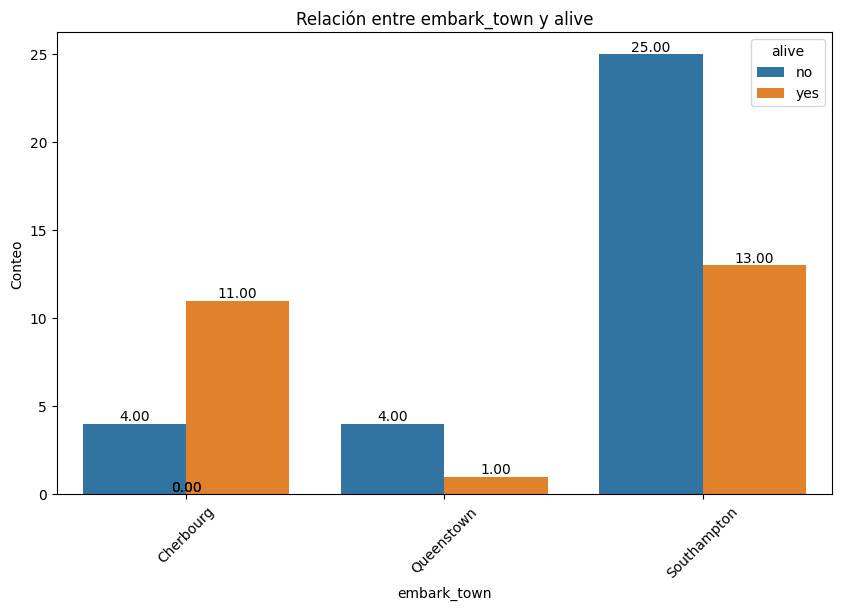

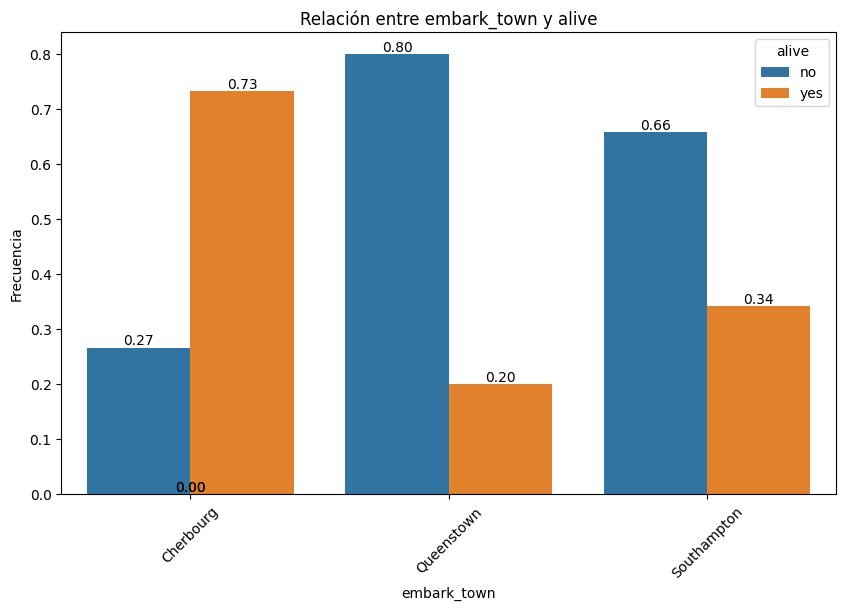

Valor Chi-Cuadrado: 7.903047315257843
P-Value: 0.019225386540995867
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 8.53448276  2.84482759 21.62068966]
 [ 6.46551724  2.15517241 16.37931034]]


In [93]:
df_test = df_titanic.loc[(df_titanic.who == "child") & (df_titanic["class"] == "Third")].copy() # Fijo clase y who, si realmente hay dependencia por otros factores entre ciudad y sobrevivir, debería salir en los test y en las gráficas
plot_categorical_relationship_fin(df_test,"embark_town","alive", relative_freq= False, show_values= True)

plot_categorical_relationship_fin(df_test,"embark_town","alive", relative_freq= True, show_values= True)

tabla_contingencia = pd.crosstab(df_test["alive"],df_test["embark_town"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

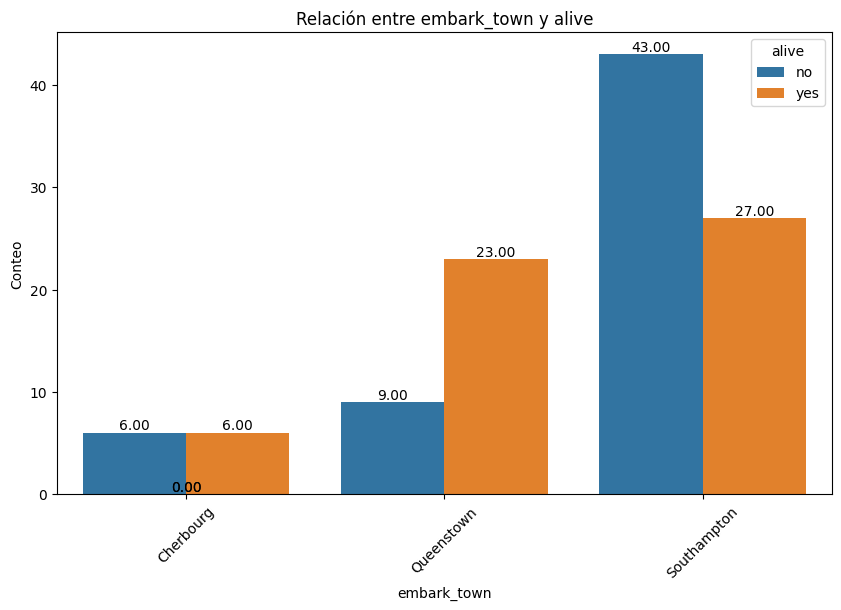

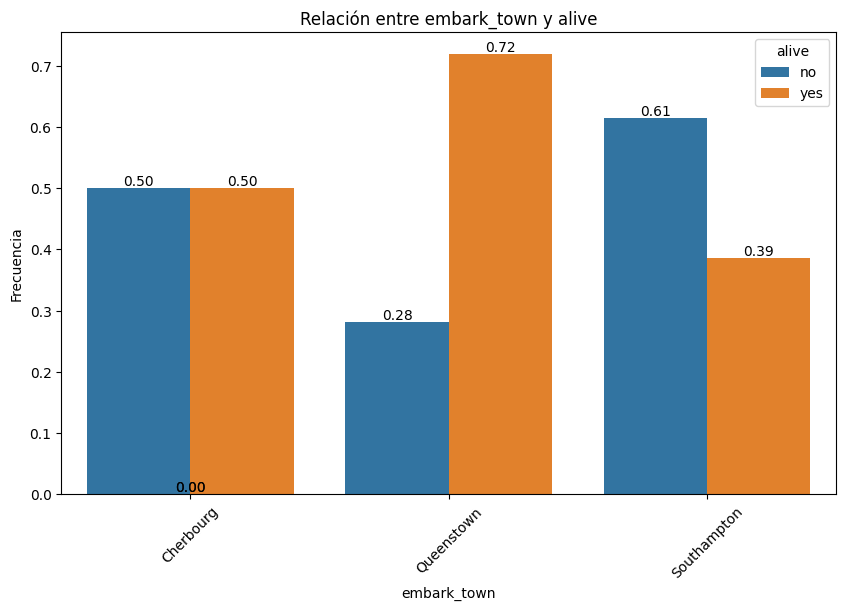

Valor Chi-Cuadrado: 9.750056078465867
P-Value: 0.007634880139676012
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 6.10526316 16.28070175 35.61403509]
 [ 5.89473684 15.71929825 34.38596491]]


In [94]:
df_test = df_titanic.loc[(df_titanic.who == "woman") & (df_titanic["class"] == "Third")].copy() # Fijo clase y who, si realmente hay dependencia por otros factores entre ciudad y sobrevivir, debería salir en los test y en las gráficas
plot_categorical_relationship_fin(df_test,"embark_town","alive", relative_freq= False, show_values= True)
plot_categorical_relationship_fin(df_test,"embark_town","alive", relative_freq= True, show_values= True)

tabla_contingencia = pd.crosstab(df_test["alive"],df_test["embark_town"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

* Hemos explicado la dependencia aparente entre embark town y supervivencia controlando por clase y who. Para 7 de las 9 combinaciones, el chi-2 nos dice que embark_town no tiene influencia sobre alive.
* Sin embargo, para los grupos de mujeres y de niños de tercera clase, sí queda una dependencia entre embark_town y alive. 
* Se podría estudiar más a fondo: nuevas hipotesis, controlar por otros factores y repetir. 
* Al final, puede que no lo consigamos explicar. Tal vez la explicación estaba en la variable "deck" que hemos eliminado.
* O tal vez la explicación no se halle en estos datos.

<Axes: >

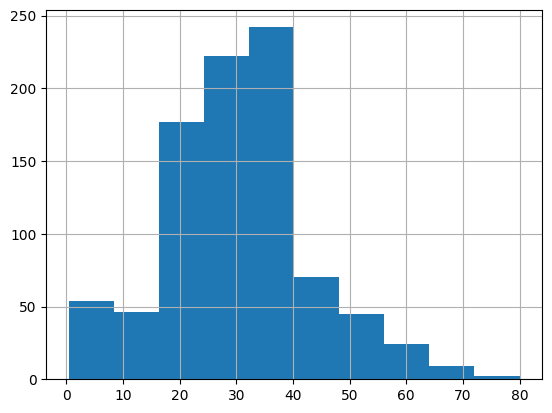

In [95]:
df_titanic.age.hist()

### ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?


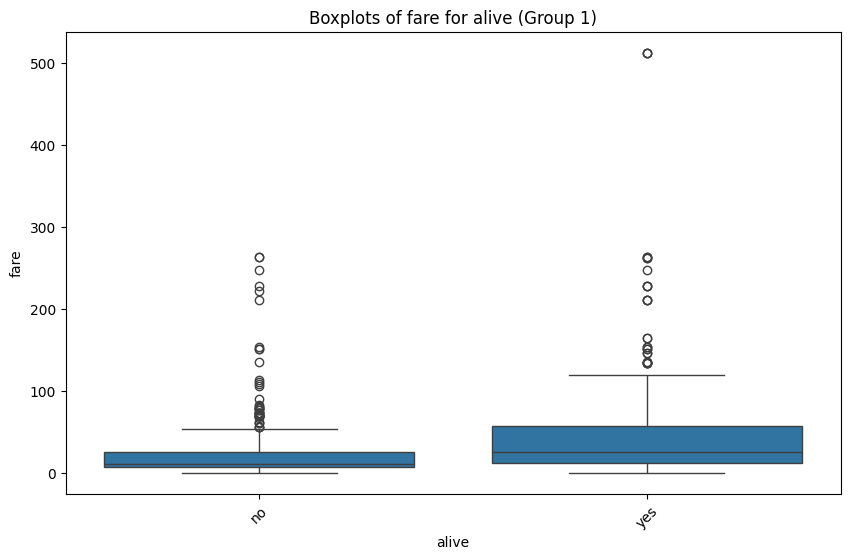

In [96]:
plot_grouped_boxplots(df_titanic,"alive","fare")

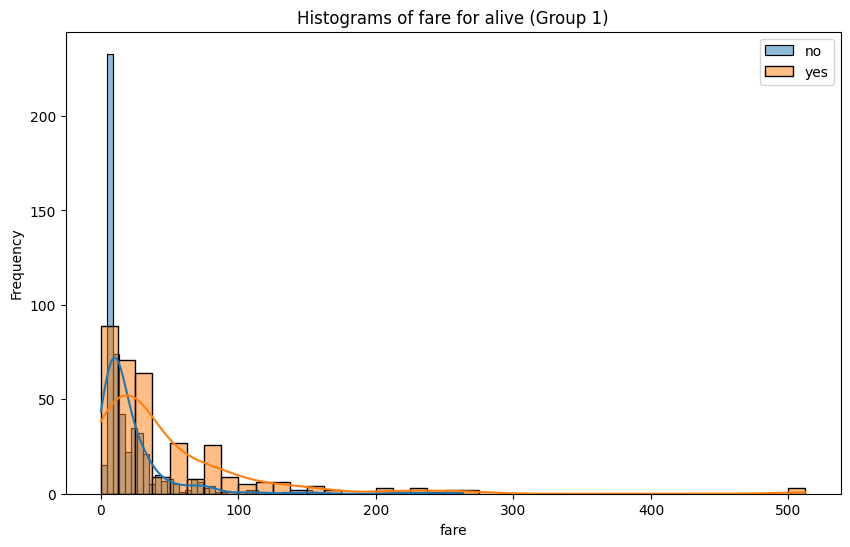

In [97]:
plot_grouped_histograms(df_titanic, "alive","fare", group_size = 2)

In [98]:
grupo_a = df_titanic.loc[df_titanic.alive == "yes"]["fare"]
grupo_b = df_titanic.loc[df_titanic.alive == "no"]["fare"]


u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 129951.5
Valor p: 4.553477179250237e-22


* Visualmente parece que si hay influencia
* El test U de Mann-Whitney nos dice que sí hay relación
* Seguramente está relacionado con la clase

### Estudio la relación entre class y fare, esperando que haya una relación porque al final parece que estamos hablando de lo mismo.

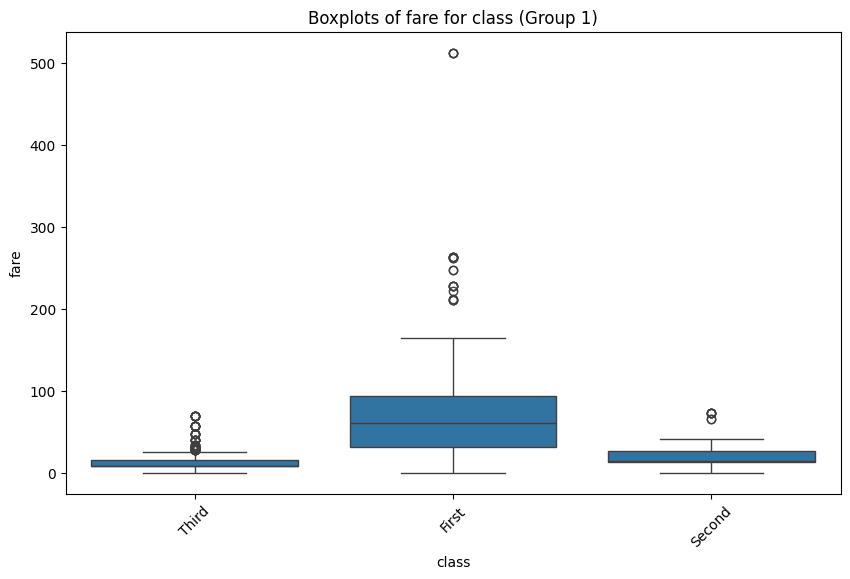

In [99]:
plot_grouped_boxplots(df_titanic,"class","fare")

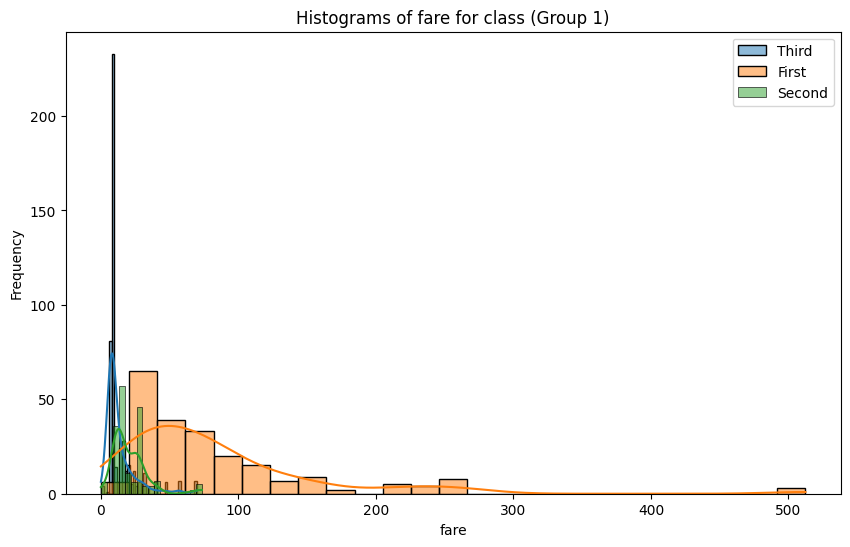

In [100]:
plot_grouped_histograms(df_titanic,"class","fare", group_size = 3)

* El histograma comparado de precios y clases, da que pensar en si se podría hacer un bin en fare
* Si existiese relevancia estadística con el fare (binned) podríamos decir que el precio es lo que salvó, independientemente de la clase
* Si se diera este caso, tendríamos que concluir: no era la clase sino el precio el que te daba mejor cabina

### Ahora hacemos dos grupos para estudiar sus características. En este caso "Fare". 

In [101]:
df_alive = df_titanic.loc[df_titanic.alive == "yes"].copy()
df_dead = df_titanic.loc[df_titanic.alive == "no"].copy()

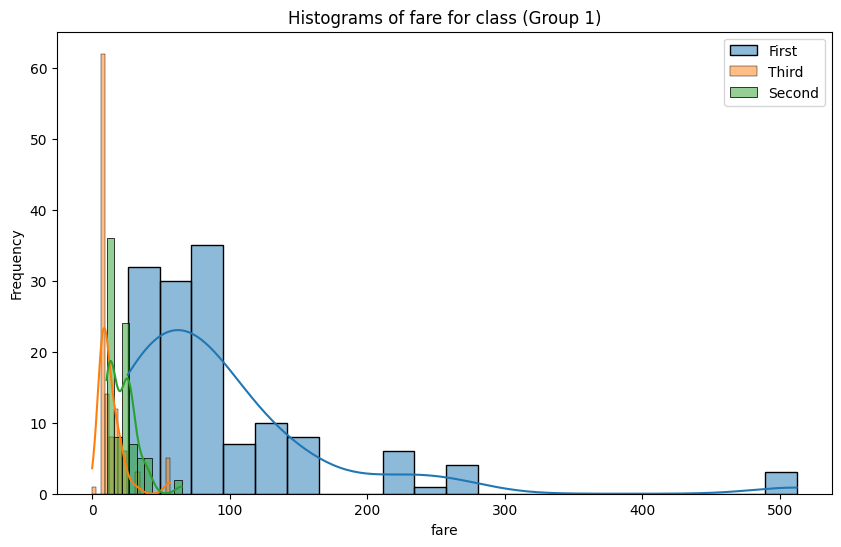

In [102]:
plot_grouped_histograms(df_alive,"class","fare", group_size = 3)

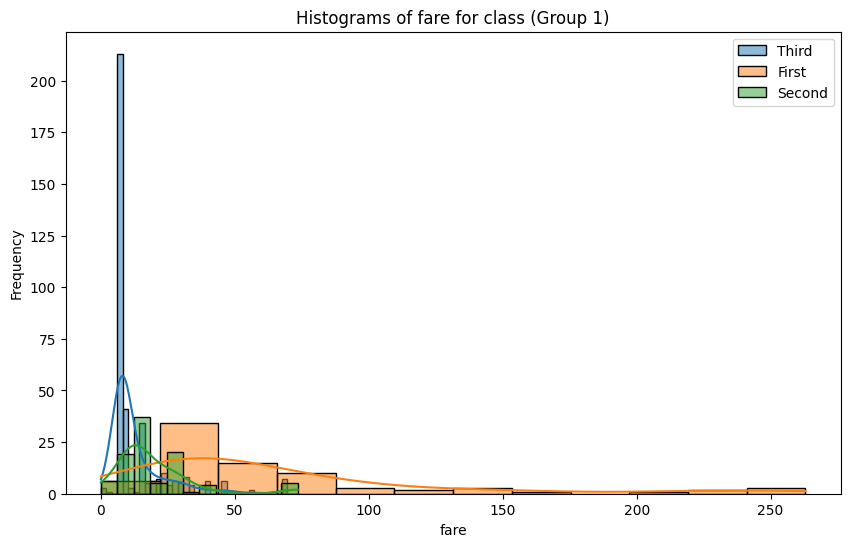

In [103]:
plot_grouped_histograms(df_dead,"class","fare", group_size = 3)

* El precio influyó en la supervivencia. 
* Pero eso ya lo sabíamos por la variable **class**.

### Existen pasajeros que no pagaron el billete?


In [104]:
df_titanic.loc[df_titanic.fare == 0]

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
179,male,36.000000,0.0,Third,man,True,Southampton,no,True,0
263,male,40.000000,0.0,First,man,True,Southampton,no,True,0
271,male,25.000000,0.0,Third,man,True,Southampton,yes,True,0
277,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
302,male,19.000000,0.0,Third,man,True,Southampton,no,True,0
413,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
466,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
481,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
597,male,49.000000,0.0,Third,man,True,Southampton,no,True,0
633,male,33.173123,0.0,First,man,True,Southampton,no,True,0


In [105]:
len(df_titanic.loc[df_titanic.fare == 0])

15

In [106]:
df_titanic.loc[df_titanic.fare == 0,'class'].value_counts()

class
Second    6
First     5
Third     4
Name: count, dtype: int64

In [107]:
df_titanic.loc[df_titanic.fare == 0 ,'class'].value_counts()

class
Second    6
First     5
Third     4
Name: count, dtype: int64

**Parece ser que la muestra de datos con la que trabajamos del manifiesto del Titanic contempla marineros de distintas clases. Capitán, etc.?**

¿Qué ocurrió con la persona que más dinero se dejó?

In [108]:
df_titanic.loc[df_titanic.fare == df_titanic.fare.max()]

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
258,female,35.0,512.3292,First,woman,False,Cherbourg,yes,True,0
679,male,36.0,512.3292,First,man,True,Cherbourg,yes,False,1
737,male,35.0,512.3292,First,man,True,Cherbourg,yes,True,0


**Todos los afortunados que pagaron 512 libras sobrevivieron**

### Ejemplo de trivariante: existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento? Sin test estadísticos.

In [109]:
def trivariant_analysis(df, directora, cat2, num1, group_size = 3, bins = "auto"):
    col_directora = directora
    col_1 = cat2
    col_2 = num1
    diccionario_multivariante = {}
    for valor in df[col_directora].unique():
        diccionario_multivariante[valor] = df.loc[df[col_directora] == valor,[col_2,col_1]] 

    for valor,df_datos in diccionario_multivariante.items():
        print(f"Respuesta {valor}:")
        plot_grouped_histograms(df_datos,col_1,col_2, group_size= group_size)

Respuesta Southampton:


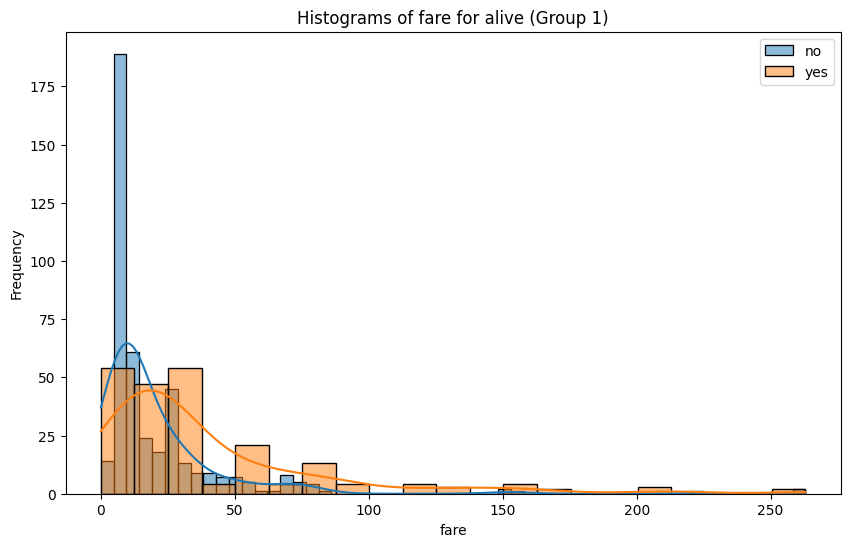

Respuesta Cherbourg:


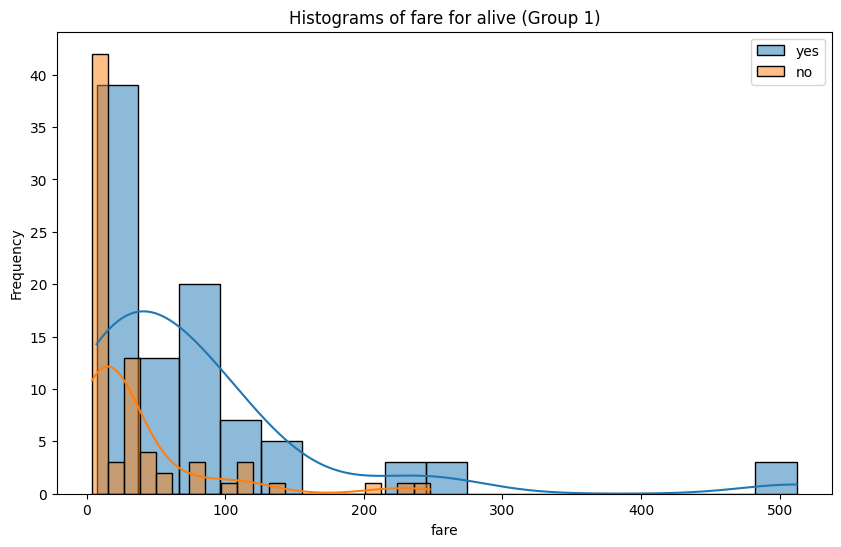

Respuesta Queenstown:


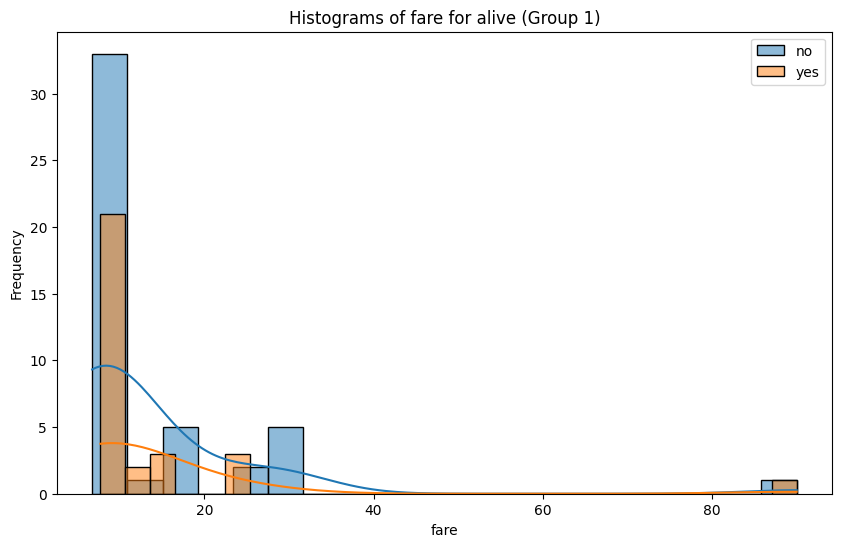

In [110]:
trivariant_analysis(df_titanic, "embark_town","alive","fare", 2, 30)

**Tendría sentido categorizar fare y 4 o 5 categorías y hacer el análsis entre categóricas entre fare_cat y alive?**
**Ya he realizado un estudia a través de la variable class así que no profundizo.**

### ¿Qué ocurre con la edad? Tiene influencia sobre la supervivencia. Vamos a estudiarlo segmentando la variable age en age_cat.
Recordatorio: se ha imputado un porcentaje de valores a edad. Convendría realizar este estudio eliminando las filas para los pasajeros para los que no tengamos ese dato.

(2,)


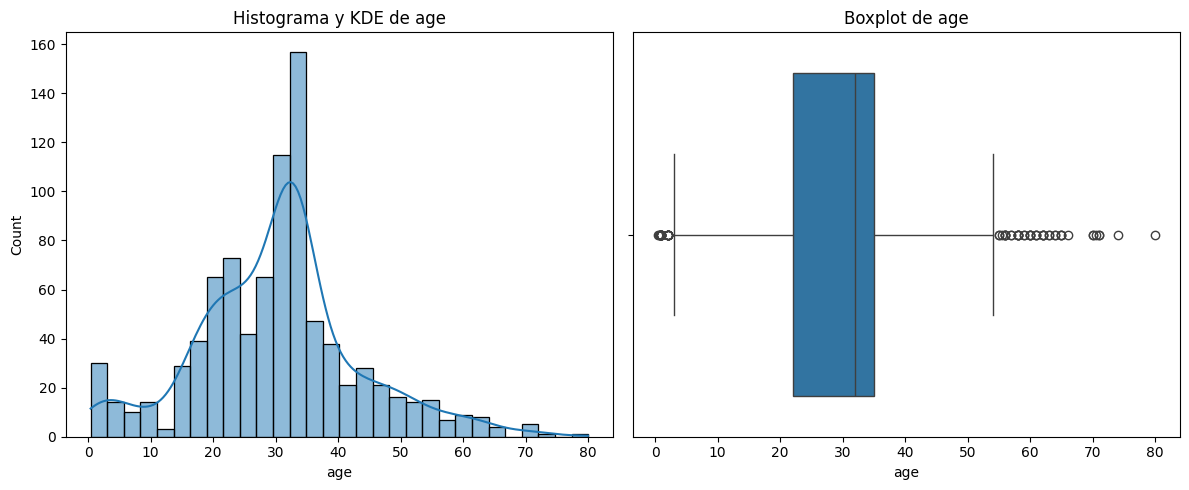

In [111]:
plot_combined_graphs(df_titanic,["age"])

In [112]:
df_titanic.age.describe()

count    891.000000
mean      30.319458
std       13.063839
min        0.420000
25%       22.000000
50%       32.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64

In [113]:
vivos = df_titanic.loc[df_titanic.alive == "yes"]
muertos = df_titanic.loc[df_titanic.alive == "no"]

<Axes: >

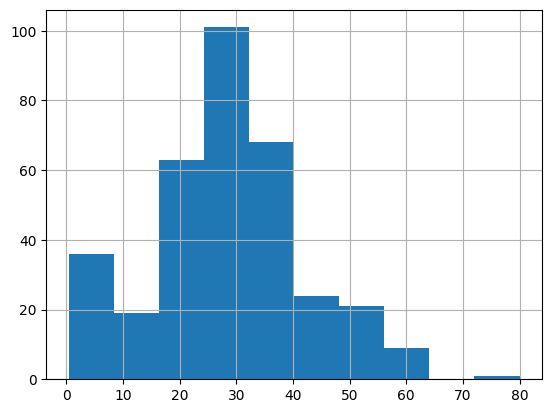

In [114]:
vivos['age'].hist()

<Axes: >

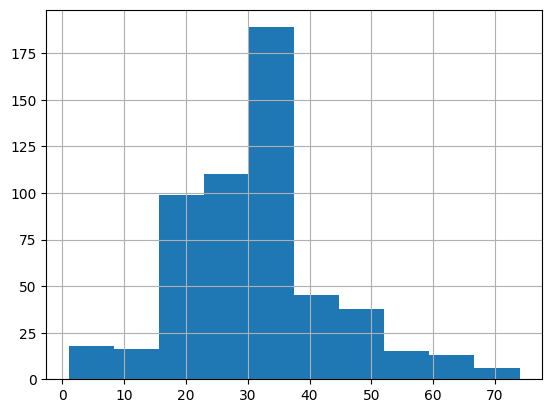

In [115]:
muertos['age'].hist()

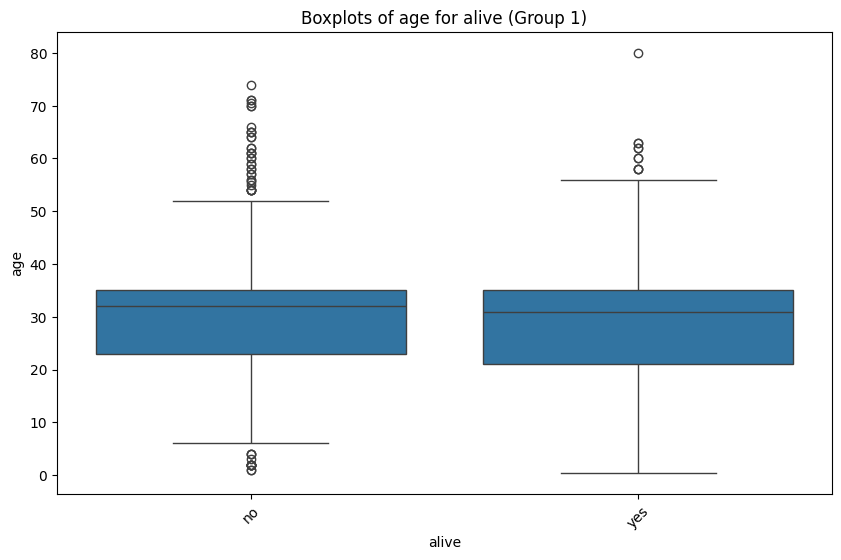

In [116]:
plot_grouped_boxplots(df_titanic,"alive","age")

In [117]:
df_titanic['age'].describe()

count    891.000000
mean      30.319458
std       13.063839
min        0.420000
25%       22.000000
50%       32.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64

In [118]:
# Escojo cuartiles como límites:
bins = [0,22,32,35,80]
df_titanic["cat_age"] = pd.cut(df_titanic.age, bins = bins, labels = ["age_1","age_2","age_3","age_4"])

c:\Users\hegoi\TheBridge\analisis_examples\viztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


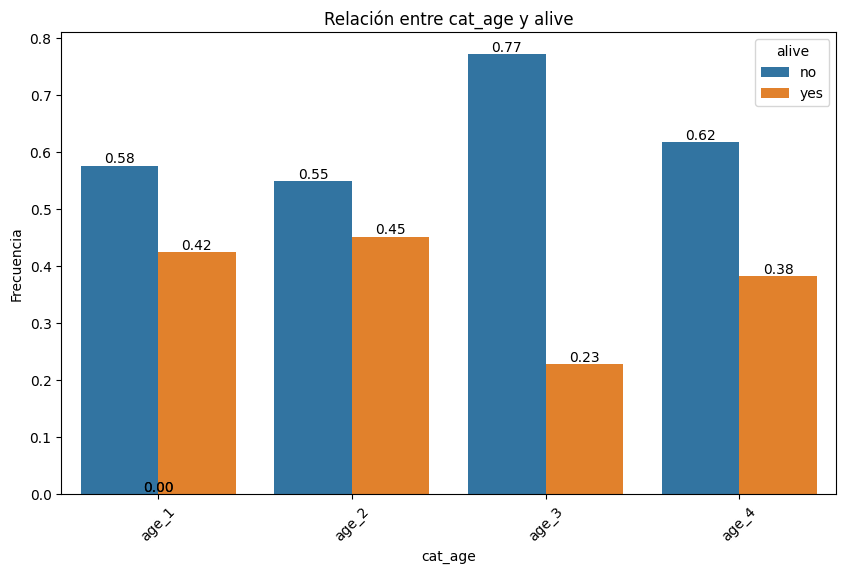

Valor Chi-Cuadrado: 25.964452881874784
P-Value: 2.3008626481449577e-06
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[103.51515152  47.44444444 398.04040404]
 [ 64.48484848  29.55555556 247.95959596]]


In [119]:
#df_test = df_titanic.loc[(df_titan].copy() # Fijo clase y who, si realmente hay dependencia por otros factores entre ciudad y sobrevivir, debería salir en los test y en las gráficas

plot_categorical_relationship_fin(df_titanic,"cat_age","alive", relative_freq= True, show_values= True)

tabla_contingencia = pd.crosstab(df_titanic["alive"],df_titanic["embark_town"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

### Concluyo que la edad tuvo un peso estadístico en la supervivencia mirado de forma aislada.


### A continuación, realizo un trivariante de **age** y **class** con la supervivencia

### 

Para intervalo de edad age_1


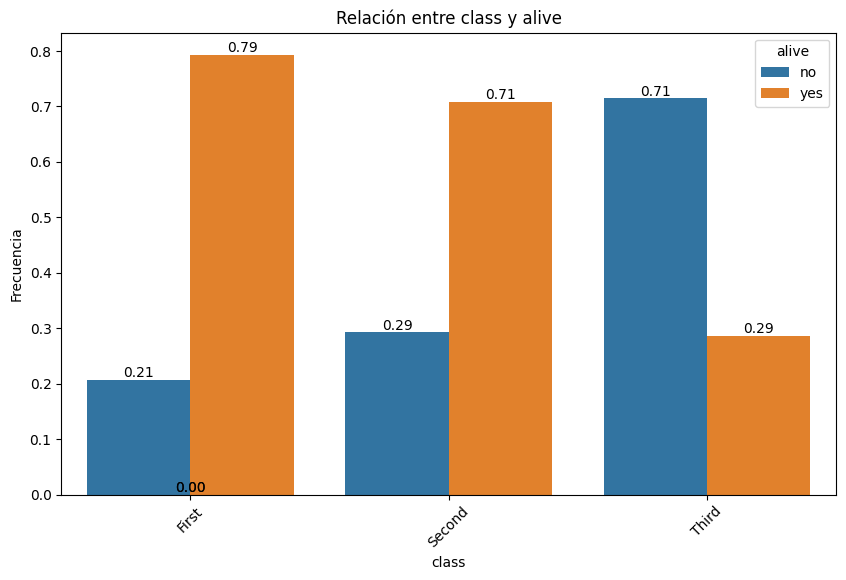

Para intervalo de edad age_2


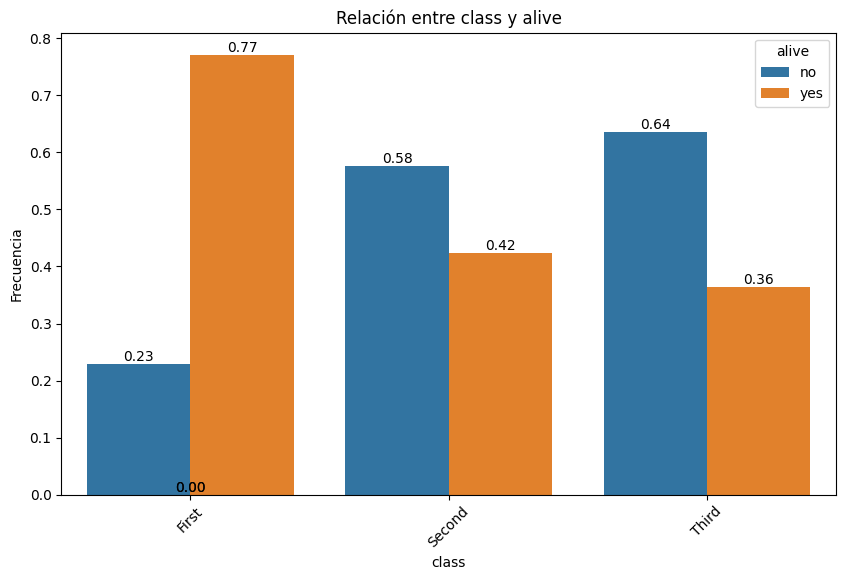

Para intervalo de edad age_3


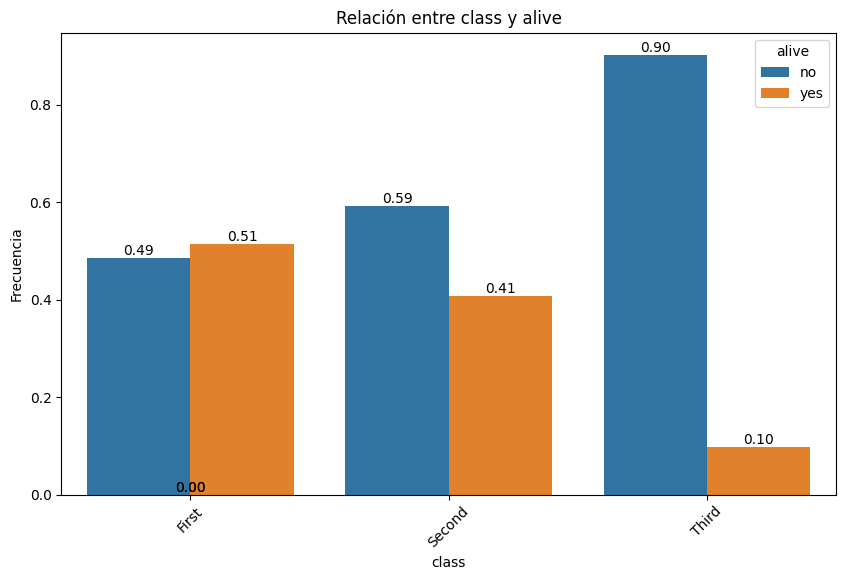

Para intervalo de edad age_4


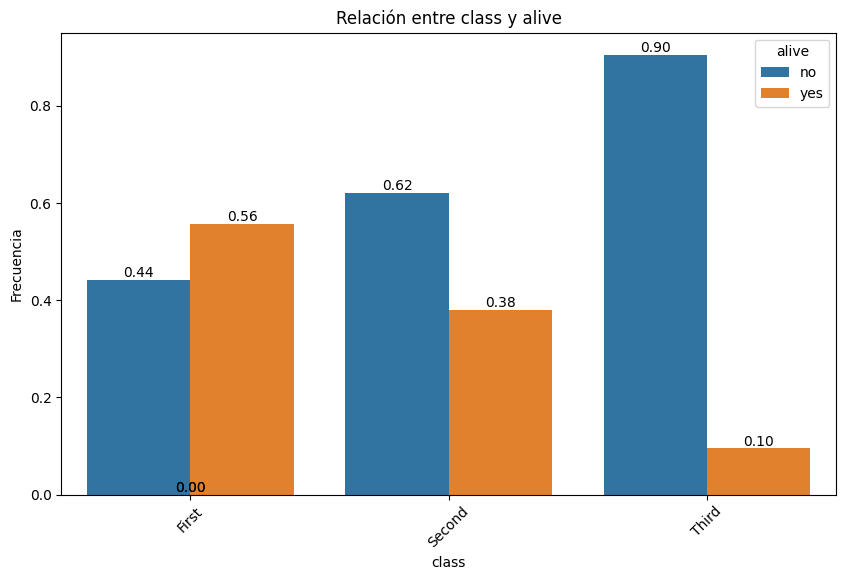

In [120]:
for bin in ['age_1','age_2','age_3','age_4']:
    df_temp = df_titanic[df_titanic['cat_age']== bin ]
    print('Para intervalo de edad',bin)
    plot_categorical_relationship_fin(df_temp,'class','alive',show_values=True,relative_freq=True)

* En términos relativos, la combinación cat_age_1 con Primera clase, es decir menores de 22 en primera clase, es la que mayor ratio de supervivencia presenta
* Los mayores de 35 (cat_age_3 y cat_age_4 conjuntamente) de tercera clase la que peor ratio de supervivencia tiene

### Posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento.

Para alive? yes


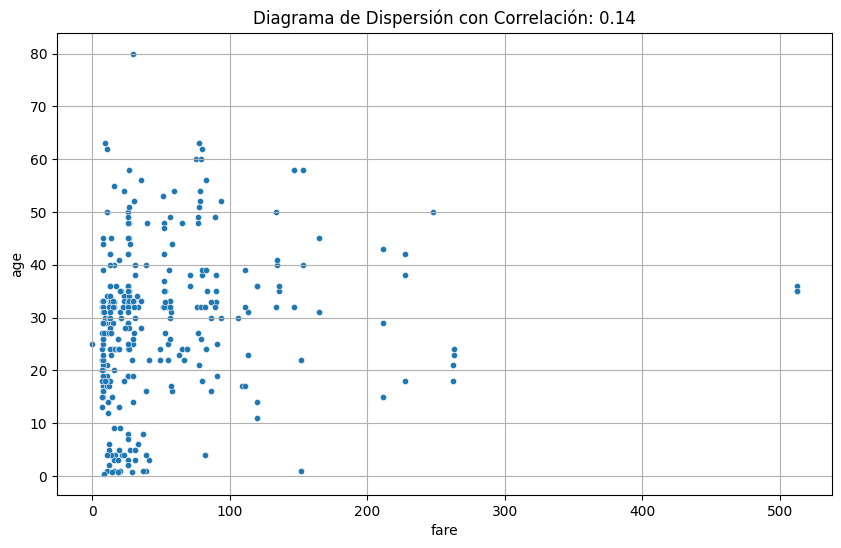

Para alive? no


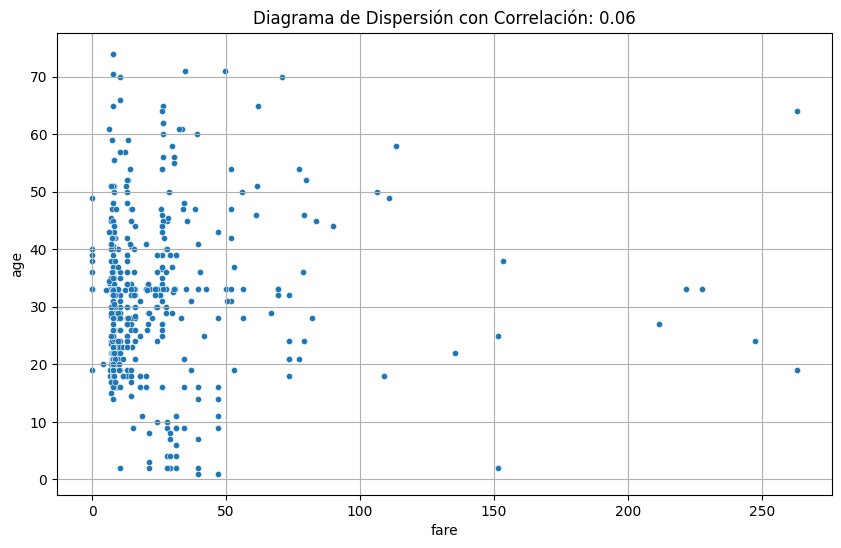

In [121]:
for bin in ['yes','no']:
    df_temp = df_titanic[df_titanic['alive']== bin ]
    print('Para alive?',bin)
    grafico_dispersion_con_correlacion(df_temp,'fare','age', tamano_puntos=20, mostrar_correlacion= True)

* No se ve una correlación entre edad y el precio del billete independientemente de si se salvaron o no
* Esto no quiere decir que entre supervivencia y precio y entre superviviecia y edad no hay cierta relación
* Esas relaciones estarían provocadas por la supervivencia superior en mujeres y niños, y en los pasajeros de primera y segunda clase
* Se podría hacer un chequeo rápido a las medias y, más en profundidad, habría que hacer los test correspondientes

### Correlation matrix para las pocas variables numéricas que tenemos.


Matriz de correlación:
                     age      fare  family_members
age             1.000000  0.080765       -0.253921
fare            0.080765  1.000000        0.217138
family_members -0.253921  0.217138        1.000000


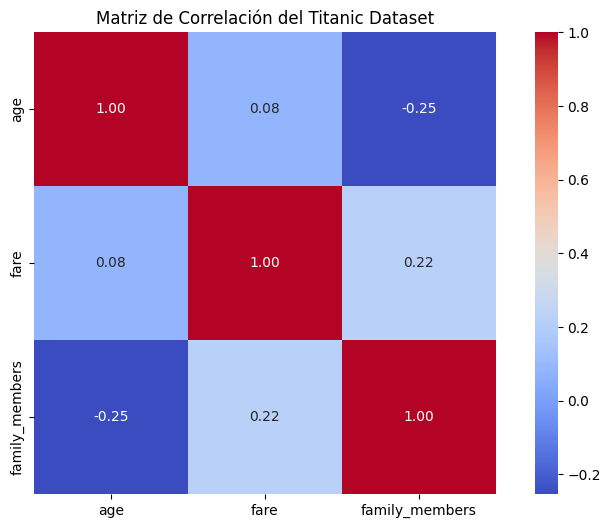

In [122]:
# Seleccionar solo las columnas numéricas
numeric_columns = df_titanic.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Mostrar la matriz de correlación
print("\nMatriz de correlación:")
print(correlation_matrix)

# Opcional: Visualizar la matriz de correlación usando un heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar=True)
plt.title("Matriz de Correlación del Titanic Dataset")
plt.show()

* Coeficiente de correlación bastante bajo entre número de familiares y edad (negativo) y número de familiares y **fare**.
* No hay manera de comprobar la consistencia de esta variable ya que no tenemos los nombres de los pasajeros.

### Quedaría por hacer un estudio del factor family members.

## CONCLUSIONES
Mensajes sencillos

* Las mujeres y niños sobrevivieron más que los hombres.
* La clase en la que viajabas tenía fuerte influencia en la supervivencia 1ra,2da,3ra. 
* Las mujeres tuvieron una tasa de supervivencia mayor que los ninios debido a que los ninios viajaban en mayor proporción en tercera clase.
* En un primer vistazo parece que el puerto de embarque influyó en la supervivencia.
* Sin embargo, esto parece explicarse por la composición de pasaje de los puertos (who, class).
* Por ejemplo, en Queenstown embarcaron más pasajeros de primera clase.


## TODO

* Hipótesis: las familias sobrevierón más.
* H: si dentro de una familia había una mujer.  
* H: si había ninios.
* H: ubicación del camarote. 